# Smart Mobility Traffic Analysis


In [145]:
#Importiamo le librerie 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Leggiamo il dataset
dataset = pd.read_csv('smart_mobility_dataset.csv')
dataset2= pd.read_csv('dataset_traffic_accident_prediction1.csv', sep=';')
dataset3= pd.read_csv('TrafficTwoMonth.csv')

dataset.head()


,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Clear,0,-0.609199,2,45,450.760055,19.574337,High
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,0,0.965442,16,1,321.800341,5.385554,High
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rain,0,0.289660,16,49,231.152655,10.277477,High
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Fog,0,-0.271965,66,10,410.384292,29.243279,High
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Snow,0,-0.797606,3,5,364.466342,16.801459,Low


In [146]:
dataset[['Road_Condition', 'Road_Type']] = dataset2[['Road_Condition', 'Road_Type']]
dataset['Weather_Condition'] = dataset2['Weather']
dataset.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition,Road_Condition,Road_Type
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Rainy,0,-0.609199,2,45,450.760055,19.574337,High,Wet,City Road
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,0,0.965442,16,1,321.800341,5.385554,High,Wet,Rural Road
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rainy,0,0.289660,16,49,231.152655,10.277477,High,Icy,Highway
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Clear,0,-0.271965,66,10,410.384292,29.243279,High,Under Construction,City Road
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Rainy,0,-0.797606,3,5,364.466342,16.801459,Low,Dry,Highway


In [147]:
dataset=dataset.drop(columns=['Traffic_Condition', 'Vehicle_Count'], axis=1)

cols_to_add = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']
for col in cols_to_add:
    dataset[col] = dataset3[col].values[:5000]

dataset.head()

,Timestamp,Latitude,Longitude,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,...,Emission_Levels_g_km,Energy_Consumption_L_h,Road_Condition,Road_Type,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,2024-03-01 00:00:00,40.842275,-73.703149,49.893435,82.652780,Yellow,Rainy,0,-0.609199,2,...,450.760055,19.574337,Wet,City Road,13,2,2,24,41,normal
1,2024-03-01 00:05:00,40.831119,-73.987354,22.383965,45.829298,Green,Clear,0,0.965442,16,...,321.800341,5.385554,Wet,Rural Road,14,1,1,36,52,normal
2,2024-03-01 00:10:00,40.819549,-73.732462,46.889699,82.772465,Green,Rainy,0,0.289660,16,...,231.152655,10.277477,Icy,Highway,10,2,2,32,46,normal
3,2024-03-01 00:15:00,40.725849,-73.980134,5.730536,37.695567,Red,Clear,0,-0.271965,66,...,410.384292,29.243279,Under Construction,City Road,10,2,2,36,50,normal
4,2024-03-01 00:20:00,40.813265,-73.961631,61.348034,22.313358,Red,Rainy,0,-0.797606,3,...,364.466342,16.801459,Dry,Highway,11,2,1,34,48,normal


## 1 - Analisi Preliminare

In [148]:
#Visualizziamo i tipi delle colonne
print(f"{dataset.dtypes}\n")

print("Number of rows: ", dataset.shape[0])
print("Number of columns: ", dataset.shape[1])

Timestamp                  object
Latitude                  float64
Longitude                 float64
Traffic_Speed_kmh         float64
Road_Occupancy_%          float64
Traffic_Light_State        object
Weather_Condition          object
Accident_Report             int64
Sentiment_Score           float64
Ride_Sharing_Demand         int64
Parking_Availability        int64
Emission_Levels_g_km      float64
Energy_Consumption_L_h    float64
Road_Condition             object
Road_Type                  object
CarCount                    int64
BikeCount                   int64
BusCount                    int64
TruckCount                  int64
Total                       int64
Traffic Situation          object
dtype: object

Number of rows:  5000
Number of columns:  21


In [149]:
# calcolo statistiche descrittive
dataset.describe()

,Latitude,Longitude,Traffic_Speed_kmh,Road_Occupancy_%,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,CarCount,BikeCount,BusCount,TruckCount,Total
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.749645,-73.847433,42.111096,54.748397,0.096000,-0.005652,50.487800,24.613000,272.174927,17.343243,64.57580,11.661800,12.371200,19.267200,107.876000
std,0.086123,0.086204,21.707720,26.145238,0.294621,0.583790,28.484426,14.532511,130.086372,7.208277,44.45762,11.329832,11.973708,10.976425,55.054326
min,40.600016,-73.999987,5.002789,10.005031,0.000000,-0.999819,1.000000,0.000000,50.136855,5.003787,5.00000,0.000000,0.000000,0.000000,21.000000
25%,40.675403,-73.920281,23.195752,32.089653,0.000000,-0.500154,26.000000,12.000000,160.564433,11.098761,18.00000,2.000000,2.000000,10.000000,54.000000
50%,40.748875,-73.846058,42.191599,54.657297,0.000000,-0.010564,50.000000,24.000000,272.045513,17.153791,62.00000,9.000000,10.000000,18.000000,103.000000
75%,40.824735,-73.771685,60.751760,77.581720,0.000000,0.500518,75.000000,37.000000,382.242055,23.516595,102.00000,18.000000,20.000000,28.000000,150.000000
max,40.899972,-73.700159,79.997556,99.999729,1.000000,0.999354,99.000000,49.000000,499.922663,29.995416,180.00000,70.000000,50.000000,60.000000,279.000000


In [150]:
#Verifica dati mancanti 
missing_values = dataset.isnull().sum()
print(missing_values)

Timestamp                  0
Latitude                   0
Longitude                  0
Traffic_Speed_kmh          0
Road_Occupancy_%           0
Traffic_Light_State        0
Weather_Condition         42
Accident_Report            0
Sentiment_Score            0
Ride_Sharing_Demand        0
Parking_Availability       0
Emission_Levels_g_km       0
Energy_Consumption_L_h     0
Road_Condition            42
Road_Type                 42
CarCount                   0
BikeCount                  0
BusCount                   0
TruckCount                 0
Total                      0
Traffic Situation          0
dtype: int64


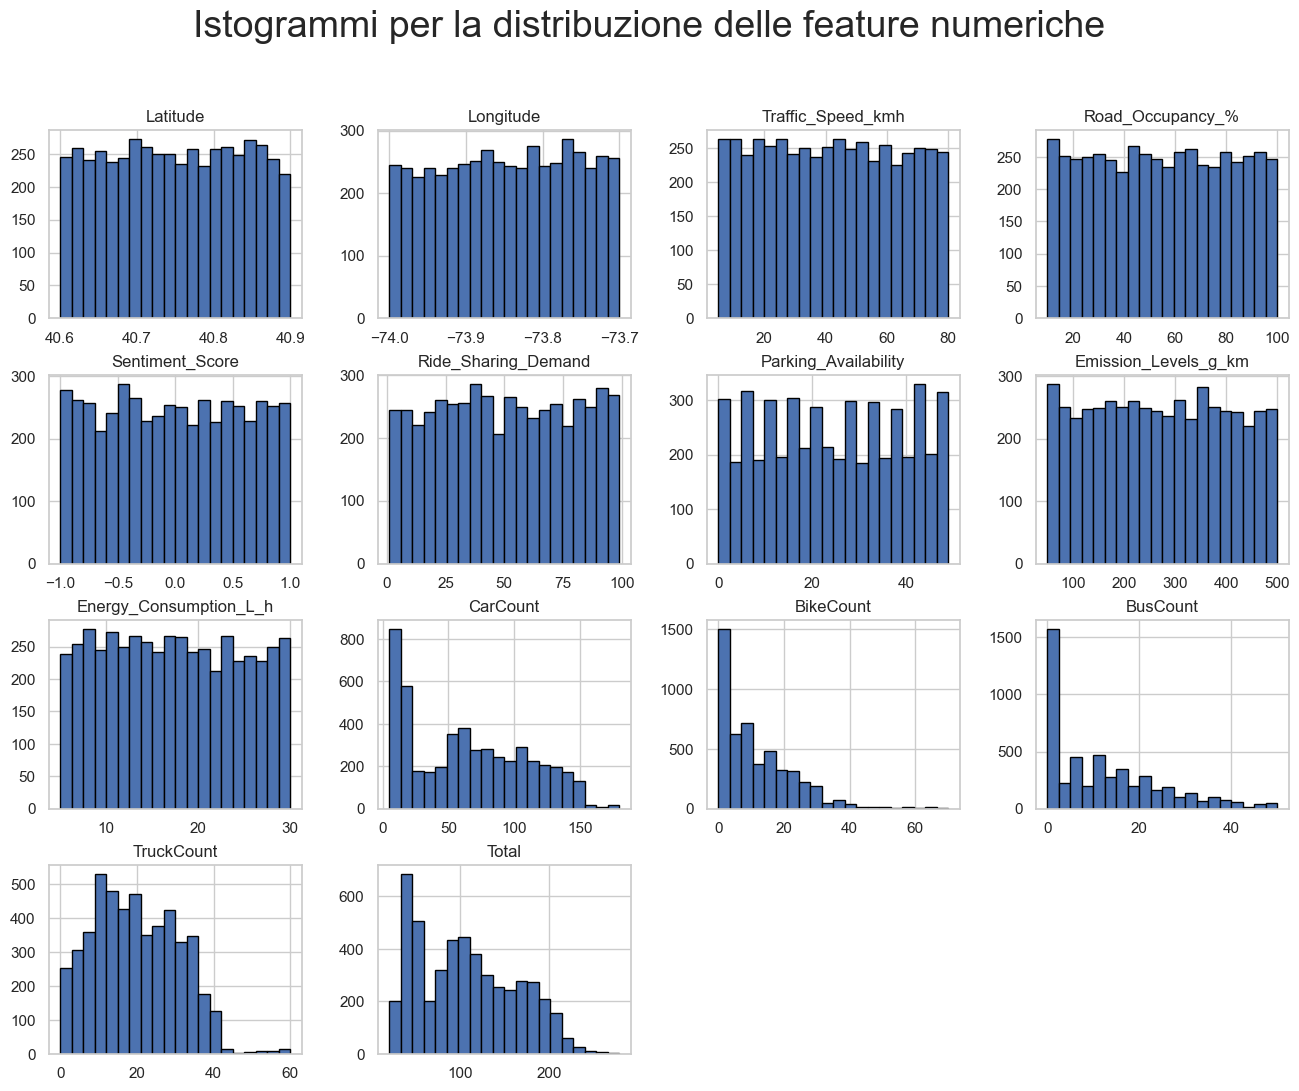

In [151]:
# Istogrammi per la distribuzione delle feature numeriche
columns_to_exclude = ['Traffic_Light_State', 'Weather_Condition', 'Accident_Report', 'Traffic Situation', 'Road_Type']

data_subset = dataset.drop(columns=columns_to_exclude)
data_subset.hist(bins=20, figsize=(16, 12), edgecolor='black')
plt.suptitle("Istogrammi per la distribuzione delle feature numeriche", fontsize=27)
plt.show()

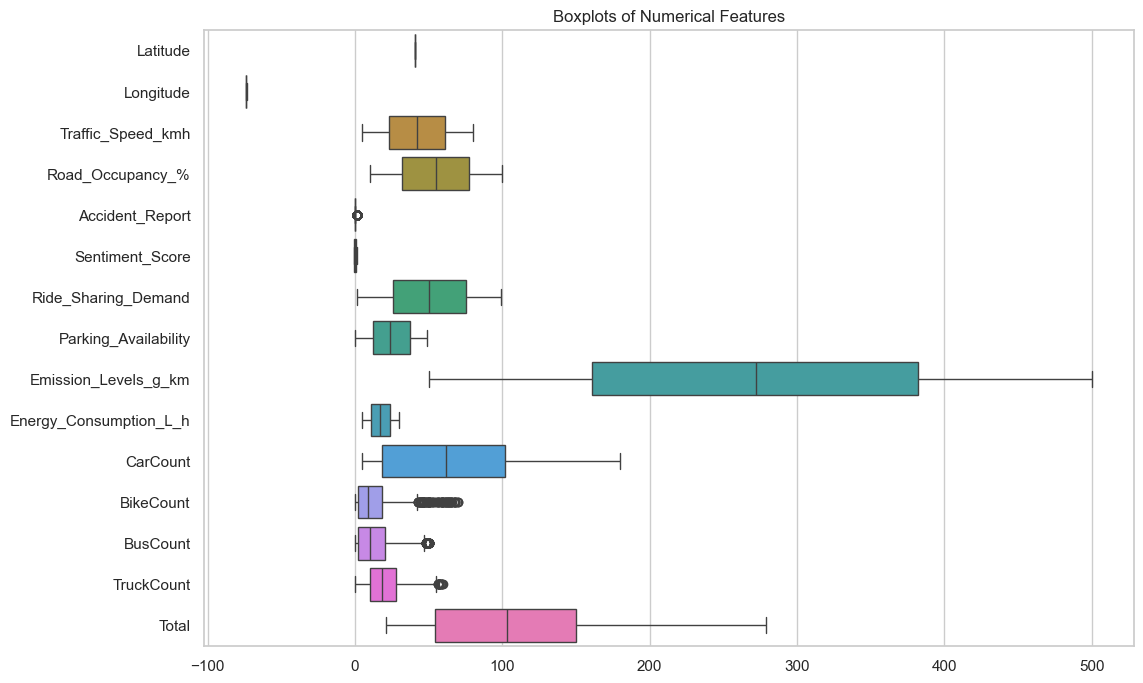

In [152]:
# Boxplot per le feature numeriche
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset, orient="h")
plt.title("Boxplots of Numerical Features")
plt.show()

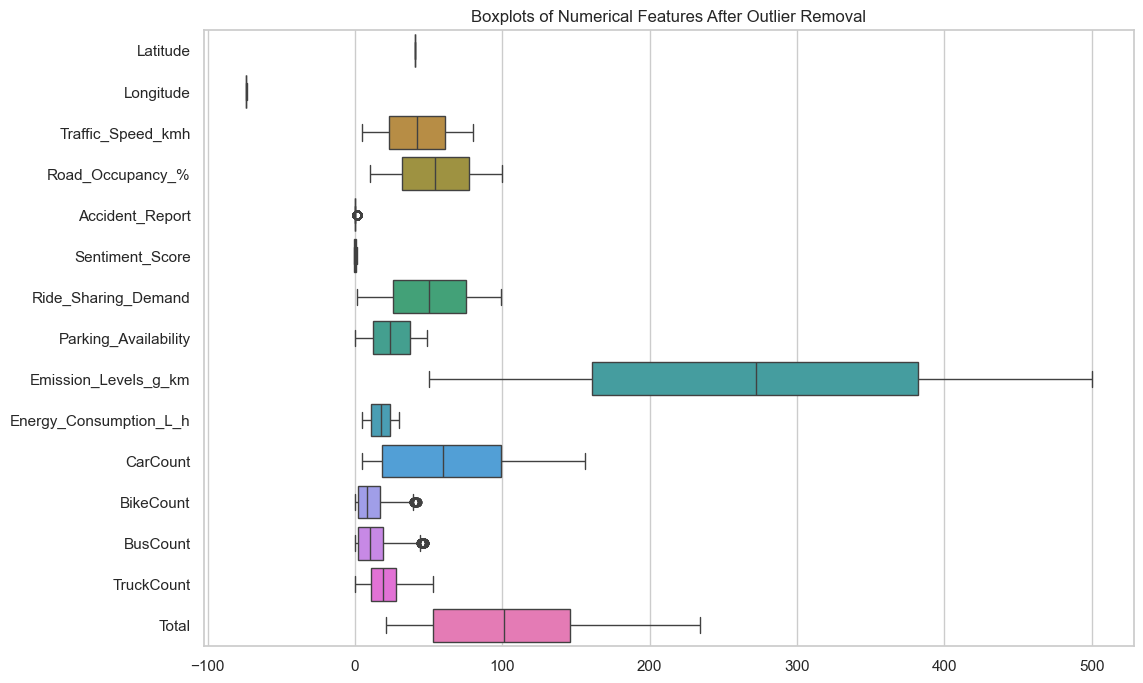

In [153]:
# Rimozione outlier per CarCount, BikeCount, TruckCount usando l'IQR
def remove_outliers_iqr(dataset, columns):
    df_clean = dataset.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean


dataset = remove_outliers_iqr(dataset, ['CarCount', 'BikeCount', 'TruckCount', 'BusCount'])
dataset.head()

# Verifica della presenza di outlier dopo la rimozione
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset, orient="h")
plt.title("Boxplots of Numerical Features After Outlier Removal")
plt.show()


In [154]:
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

dataset['Hour'] = dataset['Timestamp'].dt.hour
dataset['DayOfWeek'] = dataset['Timestamp'].dt.dayofweek
dataset['Is_Weekend'] = dataset['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
dataset['Month'] = dataset['Timestamp'].dt.month
dataset=dataset.drop(columns=['Timestamp'], axis=1)

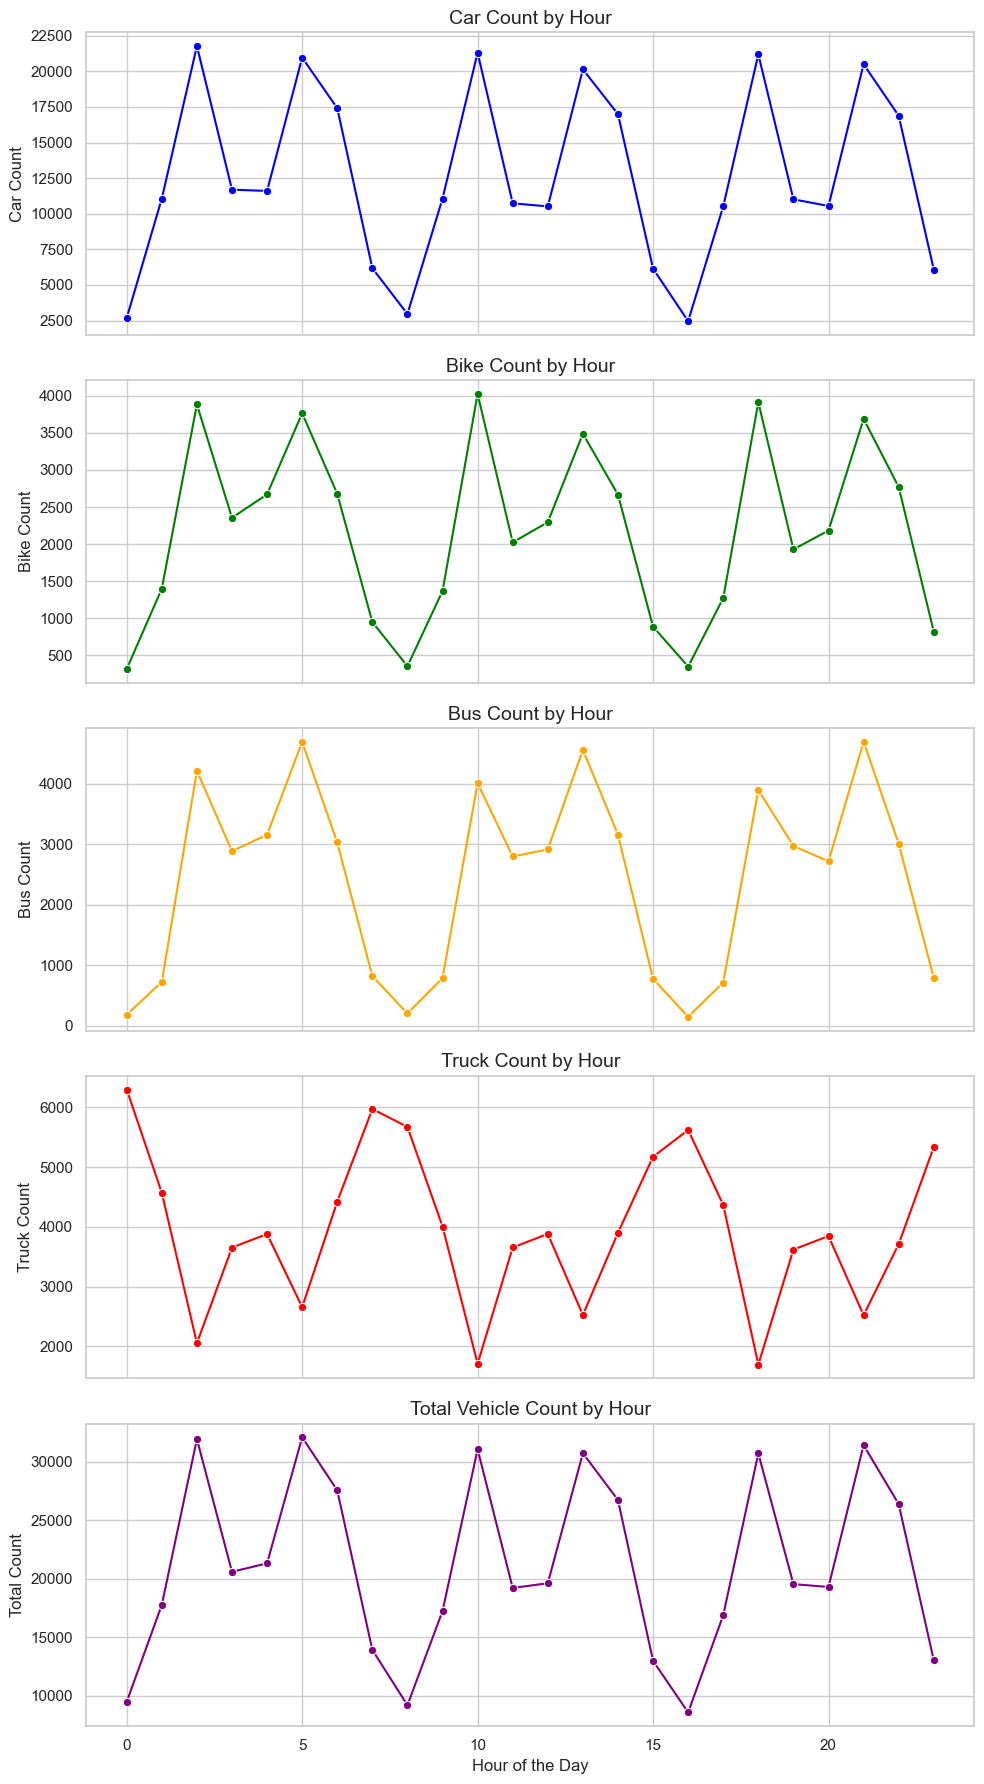

In [155]:
numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
# Group by hour and sum the vehicle counts
hourly_data = dataset.groupby('Hour')[numeric_columns].sum()

# Set the figure size and layout for separate plots
fig, axes = plt.subplots(5, 1, figsize=(10, 18), sharex=True)

# Plot for CarCount
sns.lineplot(x=hourly_data.index, y=hourly_data['CarCount'], ax=axes[0], color='blue', marker='o')
axes[0].set_title('Car Count by Hour', fontsize=14)
axes[0].set_ylabel('Car Count')

# Plot for BikeCount
sns.lineplot(x=hourly_data.index, y=hourly_data['BikeCount'], ax=axes[1], color='green', marker='o')
axes[1].set_title('Bike Count by Hour', fontsize=14)
axes[1].set_ylabel('Bike Count')

# Plot for BusCount
sns.lineplot(x=hourly_data.index, y=hourly_data['BusCount'], ax=axes[2], color='orange', marker='o')
axes[2].set_title('Bus Count by Hour', fontsize=14)
axes[2].set_ylabel('Bus Count')

# Plot for TruckCount
sns.lineplot(x=hourly_data.index, y=hourly_data['TruckCount'], ax=axes[3], color='red', marker='o')
axes[3].set_title('Truck Count by Hour', fontsize=14)
axes[3].set_ylabel('Truck Count')

# Plot for Total
sns.lineplot(x=hourly_data.index, y=hourly_data['Total'], ax=axes[4], color='purple', marker='o')
axes[4].set_title('Total Vehicle Count by Hour', fontsize=14)
axes[4].set_xlabel('Hour of the Day')
axes[4].set_ylabel('Total Count')

plt.tight_layout()
plt.show()

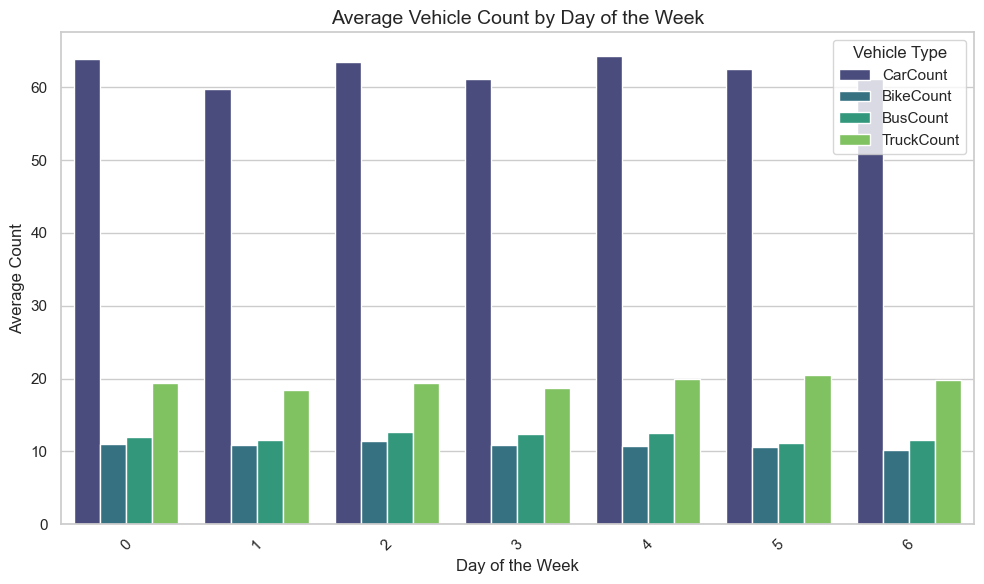

In [156]:
# Select only numeric columns, and then choose the specific columns you want
numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

# Group by 'Day of the week' and calculate the mean for only the selected numeric columns
grouped_df = dataset.groupby('DayOfWeek')[numeric_columns].mean()

# Reset the index to make 'Day of the week' a column again
grouped_df = grouped_df.reset_index()

# Use the melt function to reshape the DataFrame for seaborn
grouped_df_melted = pd.melt(grouped_df, id_vars='DayOfWeek', var_name='Vehicle Type', value_name='Count')

# Set plot style and size
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the barplot
sns.barplot(x='DayOfWeek', y='Count', hue='Vehicle Type', data=grouped_df_melted, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Average Vehicle Count by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

latitudine e longitudine, bassa distribuzione => costante => non hanno info

In [157]:
dataset=dataset.drop(columns=['Latitude', 'Longitude'], axis=1)
dataset.head()

,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,...,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,DayOfWeek,Is_Weekend,Month
0,49.893435,82.652780,Yellow,Rainy,0,-0.609199,2,45,450.760055,19.574337,...,13,2,2,24,41,normal,0,4,0,3
1,22.383965,45.829298,Green,Clear,0,0.965442,16,1,321.800341,5.385554,...,14,1,1,36,52,normal,0,4,0,3
2,46.889699,82.772465,Green,Rainy,0,0.289660,16,49,231.152655,10.277477,...,10,2,2,32,46,normal,0,4,0,3
3,5.730536,37.695567,Red,Clear,0,-0.271965,66,10,410.384292,29.243279,...,10,2,2,36,50,normal,0,4,0,3
4,61.348034,22.313358,Red,Rainy,0,-0.797606,3,5,364.466342,16.801459,...,11,2,1,34,48,normal,0,4,0,3


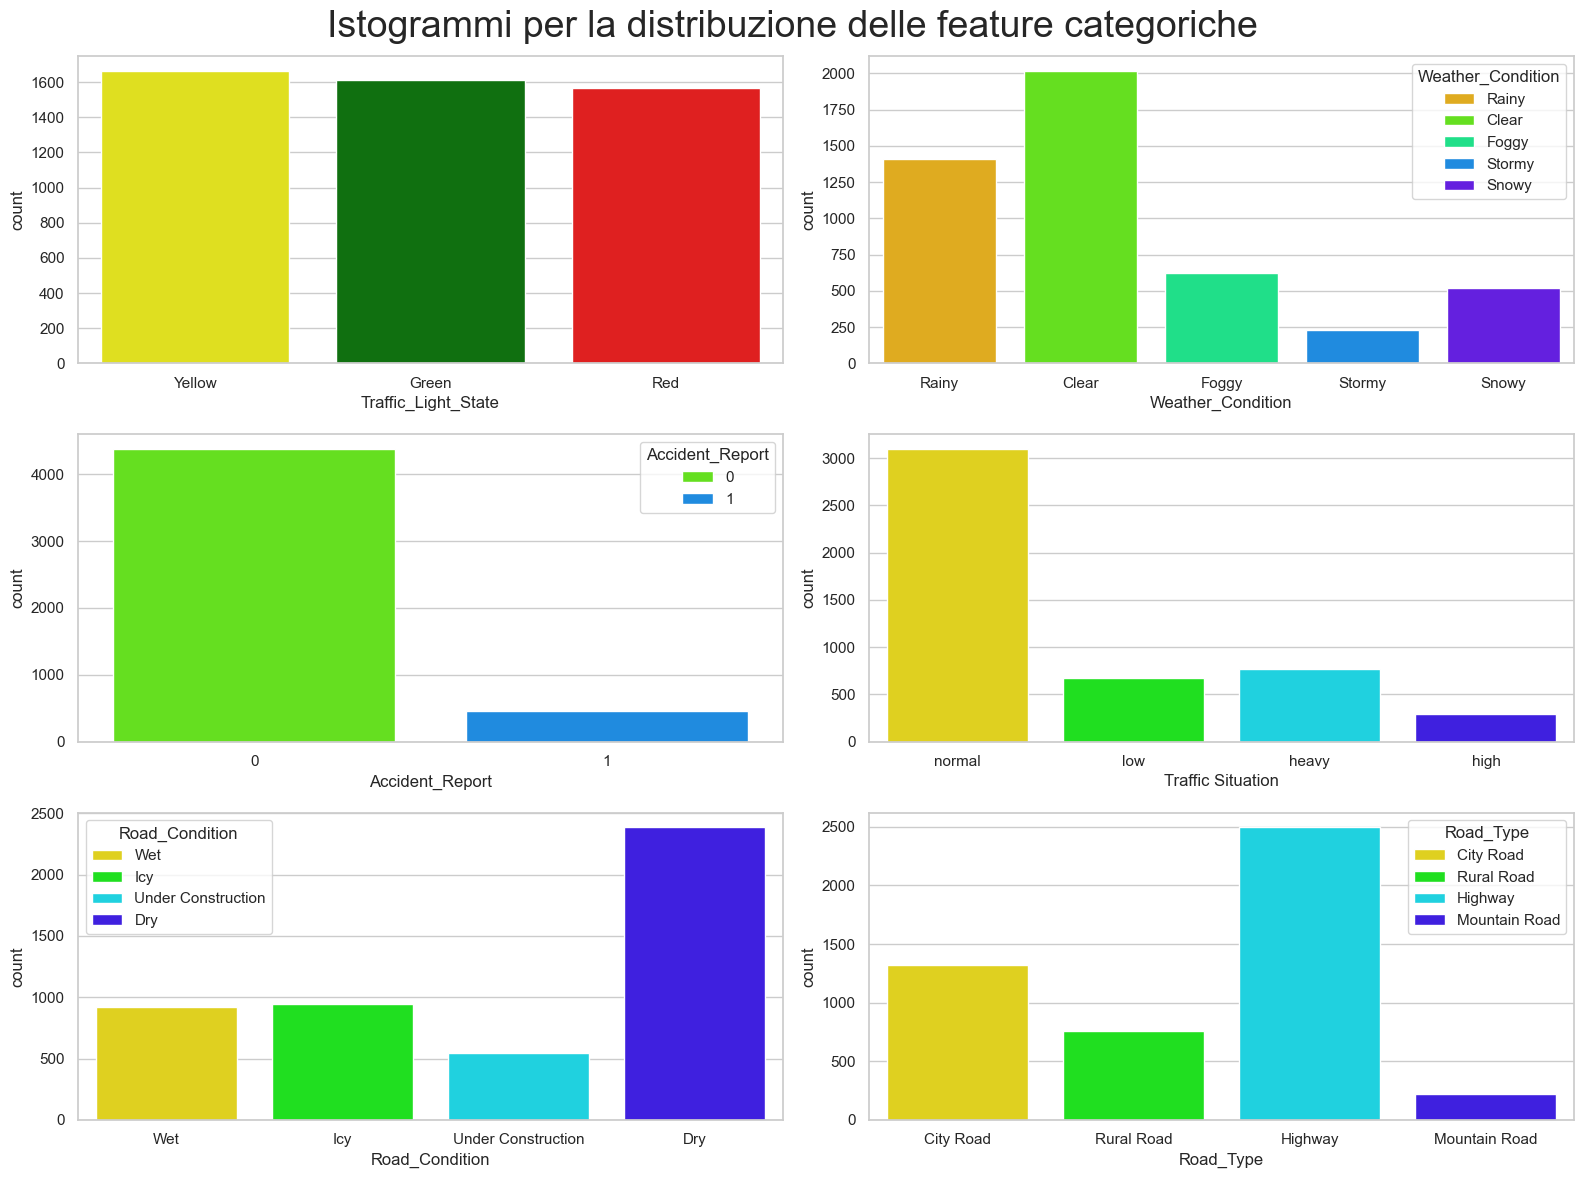

In [158]:
# Istogrammi per le features categoriche
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
sns.countplot(data=dataset, x='Traffic_Light_State', hue='Traffic_Light_State', ax=axes[0, 0], palette={'Red': 'red', 'Yellow': 'yellow', 'Green': 'green'})
sns.countplot(data=dataset, x='Weather_Condition', hue='Weather_Condition', ax=axes[0, 1], palette='gist_rainbow')
sns.countplot(data=dataset, x='Accident_Report', hue='Accident_Report', ax=axes[1, 0], palette='gist_rainbow')
sns.countplot(data=dataset, x='Traffic Situation', hue='Traffic Situation', ax=axes[1, 1], palette='gist_rainbow')
sns.countplot(data=dataset, x='Road_Condition', hue='Road_Condition', ax=axes[2, 0], palette='gist_rainbow')
sns.countplot(data=dataset, x='Road_Type', hue='Road_Type', ax=axes[2, 1], palette='gist_rainbow')
plt.suptitle("Istogrammi per la distribuzione delle feature categoriche", fontsize=27)
plt.tight_layout()
plt.show()

## 2 - Preparazione dei dati

In [159]:
# cancellazione delle feature inutili per i nostri obiettivi
dataset=dataset.drop(columns=['Sentiment_Score', 'Ride_Sharing_Demand', 'Parking_Availability'], axis=1)
dataset.head()

,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Emission_Levels_g_km,Energy_Consumption_L_h,Road_Condition,Road_Type,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,DayOfWeek,Is_Weekend,Month
0,49.893435,82.652780,Yellow,Rainy,0,450.760055,19.574337,Wet,City Road,13,2,2,24,41,normal,0,4,0,3
1,22.383965,45.829298,Green,Clear,0,321.800341,5.385554,Wet,Rural Road,14,1,1,36,52,normal,0,4,0,3
2,46.889699,82.772465,Green,Rainy,0,231.152655,10.277477,Icy,Highway,10,2,2,32,46,normal,0,4,0,3
3,5.730536,37.695567,Red,Clear,0,410.384292,29.243279,Under Construction,City Road,10,2,2,36,50,normal,0,4,0,3
4,61.348034,22.313358,Red,Rainy,0,364.466342,16.801459,Dry,Highway,11,2,1,34,48,normal,0,4,0,3


In [160]:
import numpy as np
dataset['sin_hour'] = np.sin(2 * np.pi * dataset['Hour'] / 24)
dataset['cos_hour'] = np.cos(2 * np.pi * dataset['Hour'] / 24)

dataset['sin_dayofweek'] = np.sin(2 * np.pi * dataset['DayOfWeek'] / 7)
dataset['cos_dayofweek'] = np.cos(2 * np.pi * dataset['DayOfWeek'] / 7)

### Label encoding
Per poter calcolare la matrice di correlazione trasformiamo le variabili categoriche in numeriche

In [161]:
# Inizializziamo il LabelEncoder
encoder = LabelEncoder()

# Applichiamo il Label Encoding alle colonne categoriche
# codifica delle categotie in ordine alfabetico ma a noi non va bene per Traffic Situation

# Mappatura personalizzata per Traffic Situation
traffic_condition_mapping = {'normal': 0, 'low': 1, 'heavy': 2, 'high': 3}

# Applichiamo il mapping
dataset['Traffic Situation'] = dataset['Traffic Situation'].map(traffic_condition_mapping)

# Applichiamo il Label Encoding per le altre colonne
columns_to_encode = ['Traffic_Light_State', 'Weather_Condition', 'Road_Condition', 'Road_Type']
for col in columns_to_encode:
    dataset[col] = encoder.fit_transform(dataset[col])

dataset.head()

,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Emission_Levels_g_km,Energy_Consumption_L_h,Road_Condition,Road_Type,CarCount,...,Total,Traffic Situation,Hour,DayOfWeek,Is_Weekend,Month,sin_hour,cos_hour,sin_dayofweek,cos_dayofweek
0,49.893435,82.652780,2,2,0,450.760055,19.574337,3,0,13,...,41,0,0,4,0,3,0.0,1.0,-0.433884,-0.900969
1,22.383965,45.829298,0,0,0,321.800341,5.385554,3,3,14,...,52,0,0,4,0,3,0.0,1.0,-0.433884,-0.900969
2,46.889699,82.772465,0,2,0,231.152655,10.277477,1,1,10,...,46,0,0,4,0,3,0.0,1.0,-0.433884,-0.900969
3,5.730536,37.695567,1,0,0,410.384292,29.243279,2,0,10,...,50,0,0,4,0,3,0.0,1.0,-0.433884,-0.900969
4,61.348034,22.313358,1,2,0,364.466342,16.801459,0,1,11,...,48,0,0,4,0,3,0.0,1.0,-0.433884,-0.900969


Dall'analisi preliminare fatta, abbiamo notate che per Road_Condition mancano delle informazioni, allora facciamo un'azione di imputazione, aggiungendo i dati mancanti sostituendoli con la media dei valori.

In [162]:
from sklearn.impute import SimpleImputer

# Imputazione dei valori mancanti per le colonne codificate (dopo label encoding)
num_imputer = SimpleImputer(strategy='mean')

for col in ['Road_Condition', 'Road_Type', 'Weather_Condition']:
    dataset[[col]] = num_imputer.fit_transform(dataset[[col]])
    print(f"Missing values in {col} after imputation:", dataset[col].isnull().sum())


Missing values in Road_Condition after imputation: 0
Missing values in Road_Type after imputation: 0
Missing values in Weather_Condition after imputation: 0


C:\Users\User\AppData\Local\Temp\ipykernel_12976\3967948119.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Lun', 'Mar', 'Mer', 'Gio', 'Ven', 'Sab', 'Dom'])
C:\Users\User\AppData\Local\Temp\ipykernel_12976\3967948119.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Weekday', 'Weekend'])


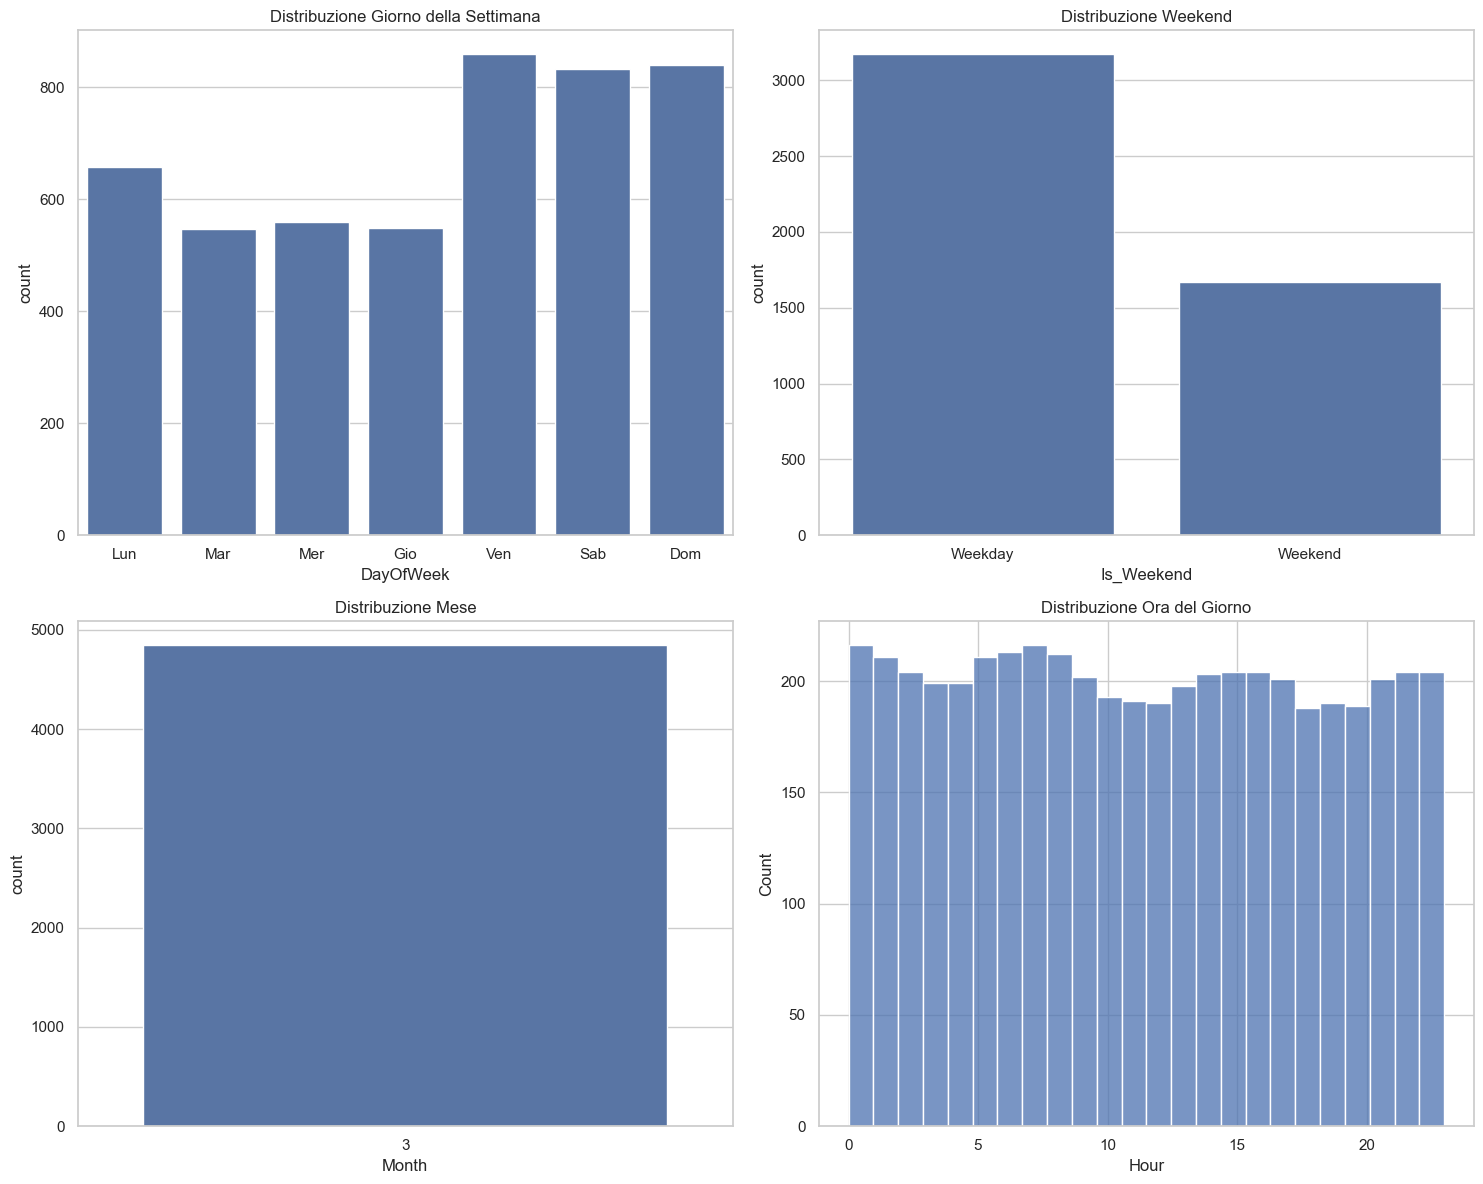

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta lo stile di seaborn
sns.set(style="whitegrid")

# Crea una figura con sottotrame
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribuzione del giorno della settimana
sns.countplot(x='DayOfWeek', data=dataset, ax=axes[0, 0])
axes[0, 0].set_title('Distribuzione Giorno della Settimana')
axes[0, 0].set_xticklabels(['Lun', 'Mar', 'Mer', 'Gio', 'Ven', 'Sab', 'Dom'])

# Distribuzione weekend
sns.countplot(x='Is_Weekend', data=dataset, ax=axes[0, 1])
axes[0, 1].set_title('Distribuzione Weekend')
axes[0, 1].set_xticklabels(['Weekday', 'Weekend'])

# Distribuzione mese
sns.countplot(x='Month', data=dataset, ax=axes[1, 0])
axes[1, 0].set_title('Distribuzione Mese')

# Distribuzione ora del giorno
sns.histplot(dataset['Hour'], bins=24, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Distribuzione Ora del Giorno')

# Mostra i grafici
plt.tight_layout()
plt.show()


In [164]:
dataset = dataset.drop(columns=['Month'], errors='ignore')

In [165]:
# Verifichiamo l'aggiornamento delle colonne
print(f"{dataset.dtypes}\n")

Traffic_Speed_kmh         float64
Road_Occupancy_%          float64
Traffic_Light_State         int32
Weather_Condition         float64
Accident_Report             int64
Emission_Levels_g_km      float64
Energy_Consumption_L_h    float64
Road_Condition            float64
Road_Type                 float64
CarCount                    int64
BikeCount                   int64
BusCount                    int64
TruckCount                  int64
Total                       int64
Traffic Situation           int64
Hour                        int32
DayOfWeek                   int32
Is_Weekend                  int64
sin_hour                  float64
cos_hour                  float64
sin_dayofweek             float64
cos_dayofweek             float64
dtype: object



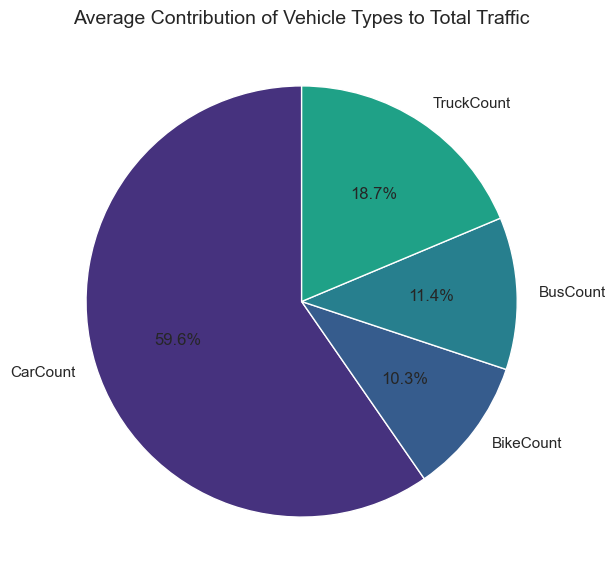

In [166]:
# Pie chart for average contribution of each vehicle type to total traffic
average_vehicle_counts = dataset[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()

plt.figure(figsize=(7, 7))
plt.pie(average_vehicle_counts, labels=average_vehicle_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

plt.title('Average Contribution of Vehicle Types to Total Traffic', fontsize=14)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df = dataset.copy()

# --- 1. Selezione e normalizzazione delle feature base ---
features_to_normalize = ['Total', 'Road_Occupancy_%', 'Traffic_Speed_kmh']
epsilon = 1e-6

# Normalizzazione con MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features_to_normalize])
scaled = scaled * (1 - 2 * epsilon) + epsilon  # Evitare 0 e 1 esatti

df[['Total_norm', 'Road_Occupancy_norm', 'Traffic_Speed_kmh_norm']] = scaled

# --- 2. Calcolo dell'indice di congestione ---
df['Congestion_Index'] = (
    0.4 * df['Total_norm'] + 0.6 * df['Road_Occupancy_norm']
)

# --- 3. Feature engineering: altre metriche utili ---
df['Vehicle_Density'] = df['Total'] / (df['Road_Occupancy_%'] + 0.001)
df['Heavy_Vehicle_Ratio'] = (df['TruckCount'] + df['BusCount']) / (df['Total'] + 0.001)
df['Light_Vehicle_Ratio'] = (df['CarCount'] + df['BikeCount']) / (df['Total'] + 0.001)

# --- 4. Interazioni tra feature ---
df['Speed_Occupancy_Interaction'] = df['Traffic_Speed_kmh'] * df['Road_Occupancy_%']

# Interazione combinata tra condizioni meteo e stradali
df['Weather_Cond'] = df['Weather_Condition'].astype(str)
df['Road_Cond'] = df['Road_Condition'].fillna('Unknown').astype(str)
df['Weather_RoadCondition'] = df['Weather_Cond'] + "_" + df['Road_Cond']
df['Weather_RoadCondition'] = LabelEncoder().fit_transform(df['Weather_RoadCondition'])

# --- 5. Rimozione delle feature originali ---
df = df.drop(columns=['Weather_Cond', 'Road_Cond'])
df = df.drop(columns=['Total', 'Road_Occupancy_%', 'Traffic_Speed_kmh'])
df = df.drop(columns=['CarCount', 'BikeCount', 'BusCount', 'TruckCount'])
df = df.drop(columns=['Hour', 'DayOfWeek'])

dataset=df
dataset.head()

,Traffic_Light_State,Weather_Condition,Accident_Report,Emission_Levels_g_km,Energy_Consumption_L_h,Road_Condition,Road_Type,Traffic Situation,Is_Weekend,sin_hour,...,cos_dayofweek,Total_norm,Road_Occupancy_norm,Traffic_Speed_kmh_norm,Congestion_Index,Vehicle_Density,Heavy_Vehicle_Ratio,Light_Vehicle_Ratio,Speed_Occupancy_Interaction,Weather_RoadCondition
0,2,2.0,0,450.760055,19.574337,3.0,0.0,0,0,0.0,...,-0.900969,0.093898,0.807244,0.598584,0.521906,0.496045,0.634131,0.365845,4123.831086,13
1,0,0.0,0,321.800341,5.385554,3.0,3.0,0,0,0.0,...,-0.900969,0.145541,0.398071,0.231766,0.297059,1.134621,0.711525,0.288456,1025.841392,3
2,0,2.0,0,231.152655,10.277477,1.0,1.0,0,0,0.0,...,-0.900969,0.117372,0.808574,0.558531,0.532093,0.555734,0.739114,0.260864,3881.175996,11
3,1,0.0,0,410.384292,29.243279,2.0,0.0,0,0,0.0,...,-0.900969,0.136151,0.307691,0.009705,0.239075,1.326381,0.759985,0.239995,216.015822,2
4,1,2.0,0,364.466342,16.801459,0.0,1.0,0,0,0.0,...,-0.900969,0.126761,0.136768,0.751322,0.132765,2.151081,0.729151,0.270828,1368.880650,10


| **Nome Variabile**            | **Formula / Calcolo**                                  | **Significato**                                                     | **A cosa serve**                                             |
| ----------------------------- | ------------------------------------------------------ | ------------------------------------------------------------------- | ------------------------------------------------------------ |
| `Total_norm`                  | Normalizzazione Min-Max di `Total`                     | Quantità totale di veicoli su scala 0-1                             | Usata per indici combinati, evita dominanza numerica         |
| `Road_Occupancy_norm`         | Normalizzazione Min-Max di `Road_Occupancy_%`          | Percentuale di occupazione della strada normalizzata                | Parte dell’indice di congestione                             |
| `Traffic_Speed_kmh_norm`      | Normalizzazione Min-Max di `Traffic_Speed_kmh`         | Velocità media del traffico normalizzata                            | Rende confrontabile la velocità con altre metriche           |
| `Congestion_Index`            | `0.4 * Total_norm + 0.6 * Road_Occupancy_norm`         | Indice composito della congestione (più veicoli + alta occupazione) | Predire congestione e velocità                               |
| `Vehicle_Density`             | `Total / (Road_Occupancy_% + 0.001)`                   | Veicoli per unità di spazio stradale                                | Misura diretta della densità del traffico                    |
| `Heavy_Vehicle_Ratio`         | `(TruckCount + BusCount) / (Total + 0.001)`            | Percentuale di veicoli pesanti                                      | I camion e bus rallentano il traffico: predizione situazione |
| `Light_Vehicle_Ratio`         | `(CarCount + BikeCount) / (Total + 0.001)`             | Percentuale di veicoli leggeri                                      | Veicoli agili: possono indicare flusso più veloce            |
| `Speed_Occupancy_Interaction` | `Traffic_Speed_kmh * Road_Occupancy_%`                 | Interazione tra velocità e occupazione                              | Se basso: strada occupata e traffico lento → congestione     |
| `Weather_RoadCondition`       | Encoding di `Weather_Condition + "_" + Road_Condition` | Combinazione meteo-strada (es. pioggia + bagnata, sole + asciutta)  | Permette di cogliere pattern ambientali complessi            |


In [168]:
# calcolo statistiche descrittive
dataset.describe()

,Traffic_Light_State,Weather_Condition,Accident_Report,Emission_Levels_g_km,Energy_Consumption_L_h,Road_Condition,Road_Type,Traffic Situation,Is_Weekend,sin_hour,...,cos_dayofweek,Total_norm,Road_Occupancy_norm,Traffic_Speed_kmh_norm,Congestion_Index,Vehicle_Density,Heavy_Vehicle_Ratio,Light_Vehicle_Ratio,Speed_Occupancy_Interaction,Weather_RoadCondition
count,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4.843000e+03,...,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000
mean,1.011563,1.267603,0.096015,272.422171,17.386396,1.026430,1.114598,0.642577,0.345241,1.394453e-02,...,-0.011235,0.392978,0.496670,0.495767,0.455194,2.714986,0.383522,0.616465,2300.343668,7.364444
std,0.822212,1.279359,0.294642,130.030186,7.202123,1.201216,1.006525,0.957190,0.475496,7.075623e-01,...,0.705143,0.246345,0.290523,0.288861,0.200069,2.619614,0.215346,0.215352,1715.984780,6.518549
min,0.000000,0.000000,0.000000,50.136855,5.003787,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,...,-0.900969,0.000001,0.000001,0.000001,0.015925,0.250500,0.010309,0.106381,59.903918,0.000000
25%,0.000000,0.000000,0.000000,161.045397,11.122916,0.000000,0.000000,0.000000,0.000000,-7.071068e-01,...,-0.900969,0.150235,0.245242,0.244560,0.302004,1.105332,0.207728,0.443804,907.026825,1.000000
50%,1.000000,1.000000,0.000000,272.187725,17.246836,1.000000,1.000000,0.000000,0.000000,1.224647e-16,...,-0.222521,0.375587,0.494892,0.496635,0.459007,1.932399,0.313251,0.686739,1851.598780,6.000000
75%,2.000000,2.000000,0.000000,382.264548,23.542659,2.000000,1.000000,1.000000,1.000000,7.071068e-01,...,0.623490,0.586854,0.750980,0.743687,0.602265,3.269144,0.556181,0.792267,3318.927344,12.000000
max,2.000000,5.000000,1.000000,499.922663,29.995416,4.000000,4.000000,3.000000,1.000000,1.000000e+00,...,1.000000,0.999999,0.999999,0.999999,0.977794,19.800217,0.893598,0.989681,7827.178176,29.000000


### Matrice di correlazione

Matrice di correlazione:



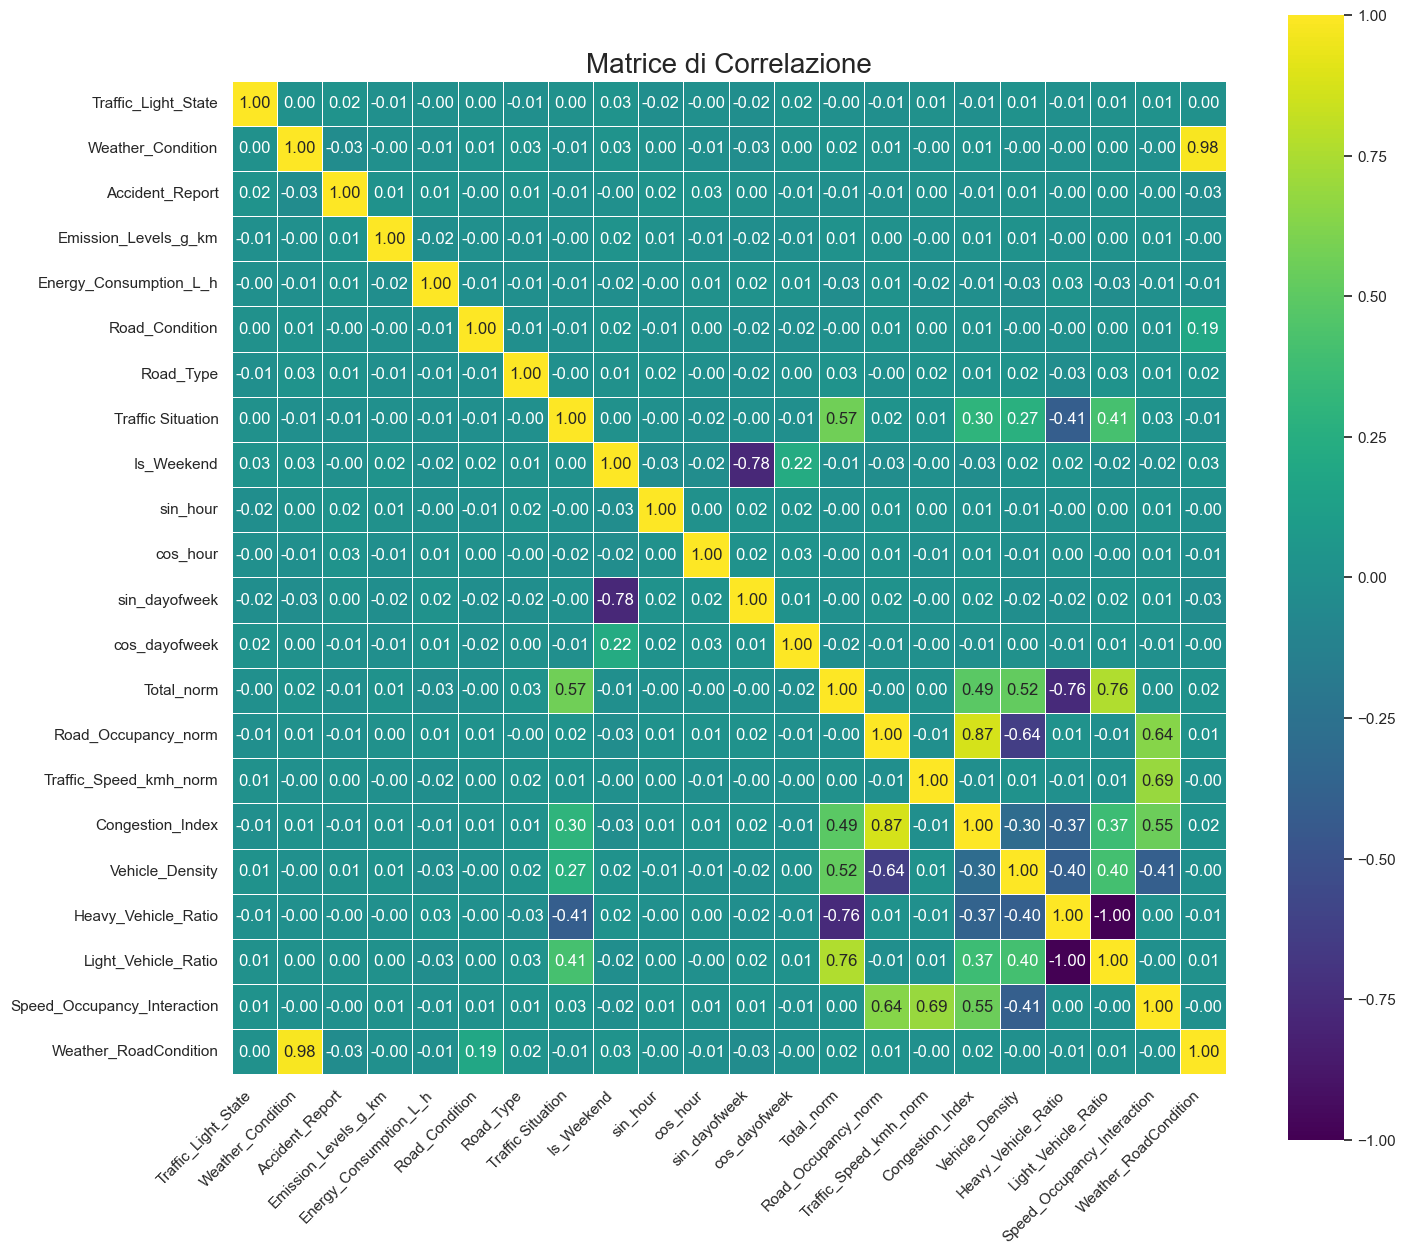

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Matrice di correlazione:\n')
corr_matrix = dataset.corr(numeric_only=True)

plt.figure(figsize=(15, 15))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='viridis',
    square=True,
    linewidths=0.5,
    linecolor='white',
    vmax=1,
    vmin=-1,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matrice di Correlazione", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
dataset=dataset.drop(columns=['Weather_Condition', 'Road_Condition', 'Total_norm', 'Road_Occupancy_norm', 'Traffic_Speed_kmh_norm'], axis=1)

KeyError: "['Weather_Condition', 'Road_Condition', 'Total_norm', 'Road_Occupancy_norm'] not found in axis"

Matrice di correlazione:



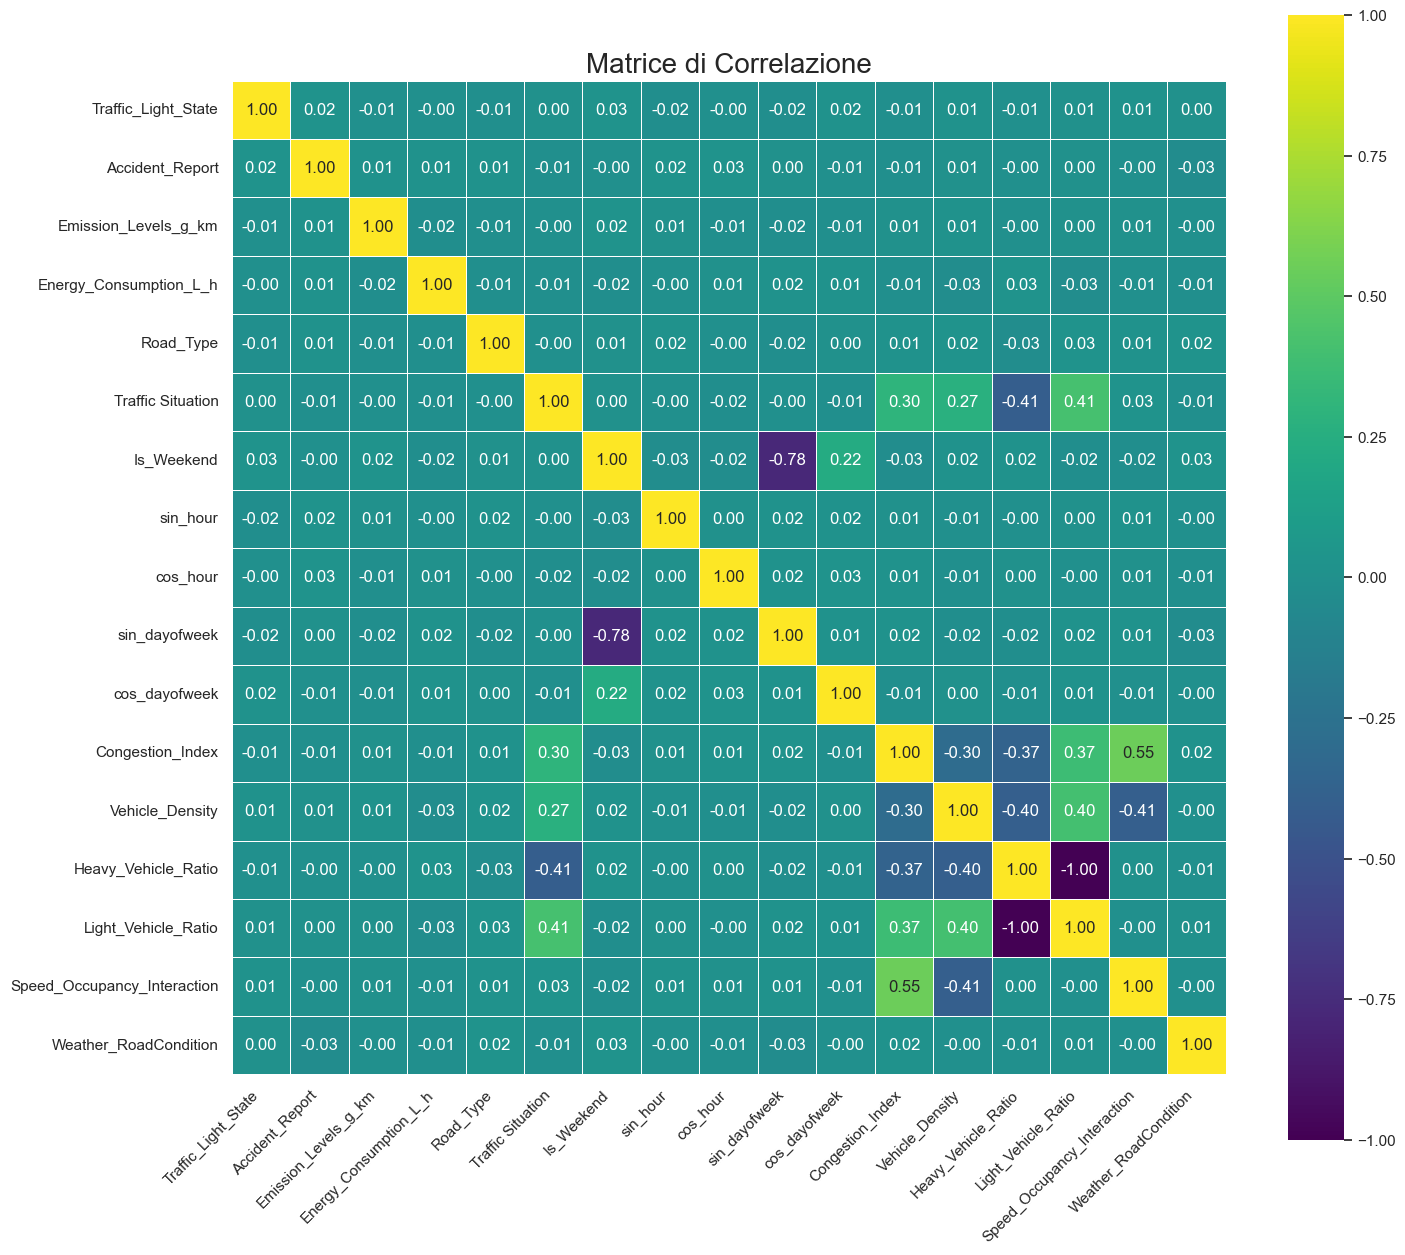

In [176]:
print('Matrice di correlazione:\n')
corr_matrix = dataset.corr(numeric_only=True)

plt.figure(figsize=(15, 15))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='viridis',
    square=True,
    linewidths=0.5,
    linecolor='white',
    vmax=1,
    vmin=-1,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matrice di Correlazione", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 3 - CLASSIFICAZIONE DELLO STATO DEL TRAFFICO

Proviamo a fare una prima classificazione senza applicare particolari tecniche di miglioramento del modello.

In [177]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = dataset.drop(columns=['Traffic Situation'])  # Features
y = dataset["Traffic Situation"]  # Target

# Divisione in train, validation e test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


X_train, y_train: dati per addestrare il modello
X_val, y_val: dati per validazione (tuning iperparametri)
X_test, y_test: dati per valutazione finale del modello
La validation serve per ottimizzare il modello senza guardare i dati di test, permettendo di scegliere i migliori iperparametri e prevenire overfitting.
Il test set resta "incontaminato" per una valutazione oggettiva delle performance finali.

Inizializzazione e addestramento Random Forest impostiamo un random_state per la riproducibilità essendo un modello stocastico, il risultato può variare ad ogni esecuzion

Classification Report:
              precision    recall  f1-score   support

      normal       0.84      0.96      0.89       614
         low       0.91      0.67      0.77       151
       heavy       0.89      0.91      0.90       148
        high       0.62      0.09      0.16        56

    accuracy                           0.85       969
   macro avg       0.82      0.66      0.68       969
weighted avg       0.85      0.85      0.83       969



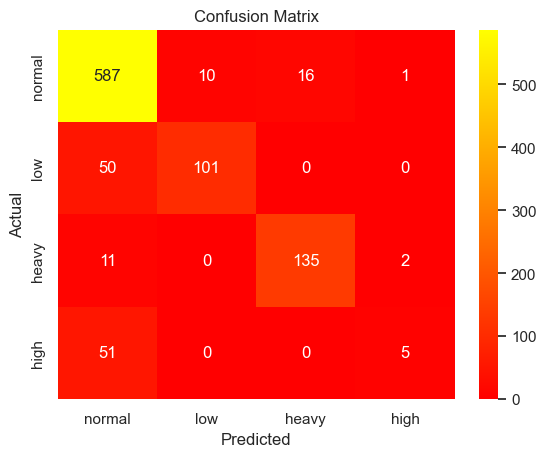

In [178]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

#Predizione e valutazione
y_pred = rf_clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["normal", "low", "heavy", "high"]))

#Matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='autumn', xticklabels=["normal", "low", "heavy", "high"], yticklabels=["normal", "low", "heavy", "high"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Da una prima analisi, il modello sembra buono. Ha buona precision, recall e f1-score per tutte le classi della variabile target. Anche dalla matrice di confusione vediamo che classifica abbastanza bene tutte le classi. La classe low è un pò più scarsetta rispetto alle altre, ma questo è dovuto al fatto che le classi, come abbiamo visto dai grafici, sono sblianciante e in particolare per la classe low.

### Analisi della foresta
Andiamo a calcolare alcune statistiche della foresta che il modello ha creato per capire se il modello
- è troppo complesso => troppe foglie => troppe regole per classificare => overfitting
- è troppo semplice => non coglie tutti i dettagli che dovrebbe dai dati
- ha overfittato, dovuta ad una profondità troppo elevata degli alberi => impara i dati di train

 Analisi della Random Forest
- Numero di alberi nella foresta: 100
- Profondità media: 21.13
- Numero medio di foglie: 383.92
- Profondità massima: 29
- Profondità minima: 17


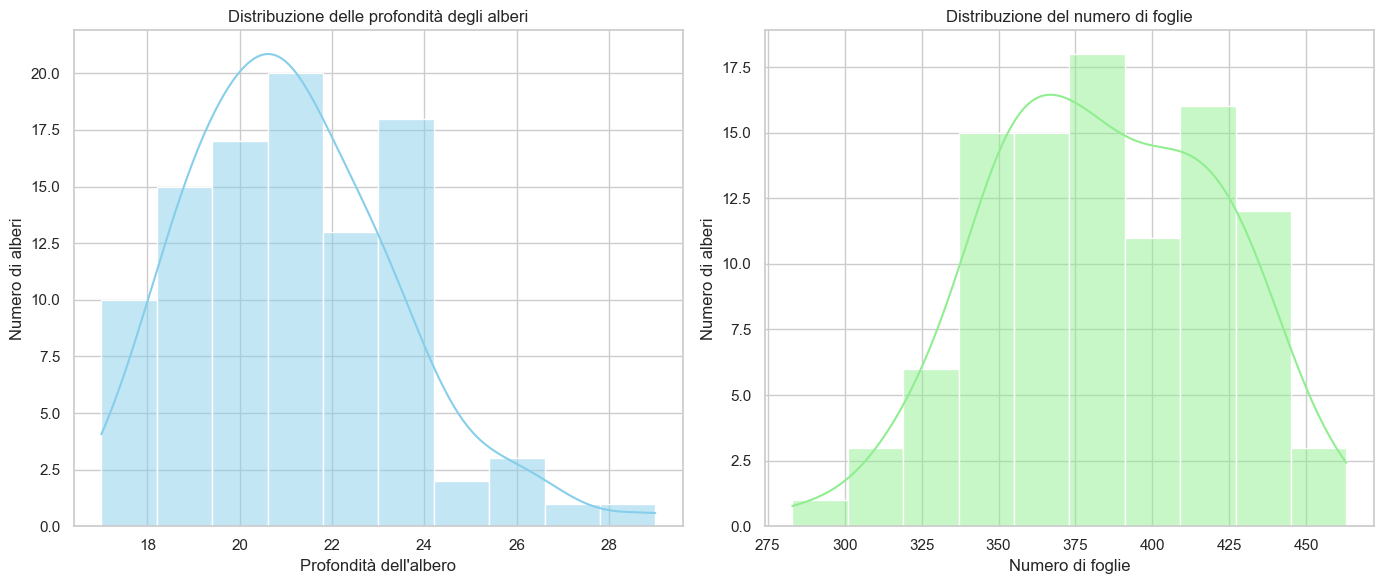

In [179]:
# Calcolo statistiche globali sugli alberi della foresta
depths = [tree.get_depth() for tree in rf_clf.estimators_]
leaves = [tree.get_n_leaves() for tree in rf_clf.estimators_]

print(" Analisi della Random Forest")
print(f"- Numero di alberi nella foresta: {len(rf_clf.estimators_)}")
print(f"- Profondità media: {sum(depths) / len(depths):.2f}")
print(f"- Numero medio di foglie: {sum(leaves) / len(leaves):.2f}")
print(f"- Profondità massima: {max(depths)}")
print(f"- Profondità minima: {min(depths)}")

# Imposta lo stile del grafico
sns.set_theme(style="whitegrid")

# Crea la figura con due sottografici
plt.figure(figsize=(14, 6))

# Distribuzione della profondità
plt.subplot(1, 2, 1)
sns.histplot(depths, bins=10, kde=True, color="skyblue")
plt.title("Distribuzione delle profondità degli alberi")
plt.xlabel("Profondità dell'albero")
plt.ylabel("Numero di alberi")

# Distribuzione del numero di foglie
plt.subplot(1, 2, 2)
sns.histplot(leaves, bins=10, kde=True, color="lightgreen")
plt.title("Distribuzione del numero di foglie")
plt.xlabel("Numero di foglie")
plt.ylabel("Numero di alberi")

# Mostra i grafici
plt.tight_layout()
plt.show()

|--- Light_Vehicle_Ratio <= 0.66
|   |--- Vehicle_Density <= 0.35
|   |   |--- Light_Vehicle_Ratio <= 0.40
|   |   |   |--- class: 0.0
|   |   |--- Light_Vehicle_Ratio >  0.40
|   |   |   |--- class: 1.0
|   |--- Vehicle_Density >  0.35
|   |   |--- Emission_Levels_g_km <= 495.02
|   |   |   |--- sin_hour <= 0.98
|   |   |   |   |--- Vehicle_Density <= 1.33
|   |   |   |   |   |--- Light_Vehicle_Ratio <= 0.47
|   |   |   |   |   |   |--- Heavy_Vehicle_Ratio <= 0.63
|   |   |   |   |   |   |   |--- Vehicle_Density <= 0.58
|   |   |   |   |   |   |   |   |--- Road_Occupancy_norm <= 0.61
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- Road_Occupancy_norm >  0.61
|   |   |   |   |   |   |   |   |   |--- cos_hour <= 0.12
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- cos_hour >  0.12
|   |   |   |   |   |   |   |   |   |   |--- Is_Weekend <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class:

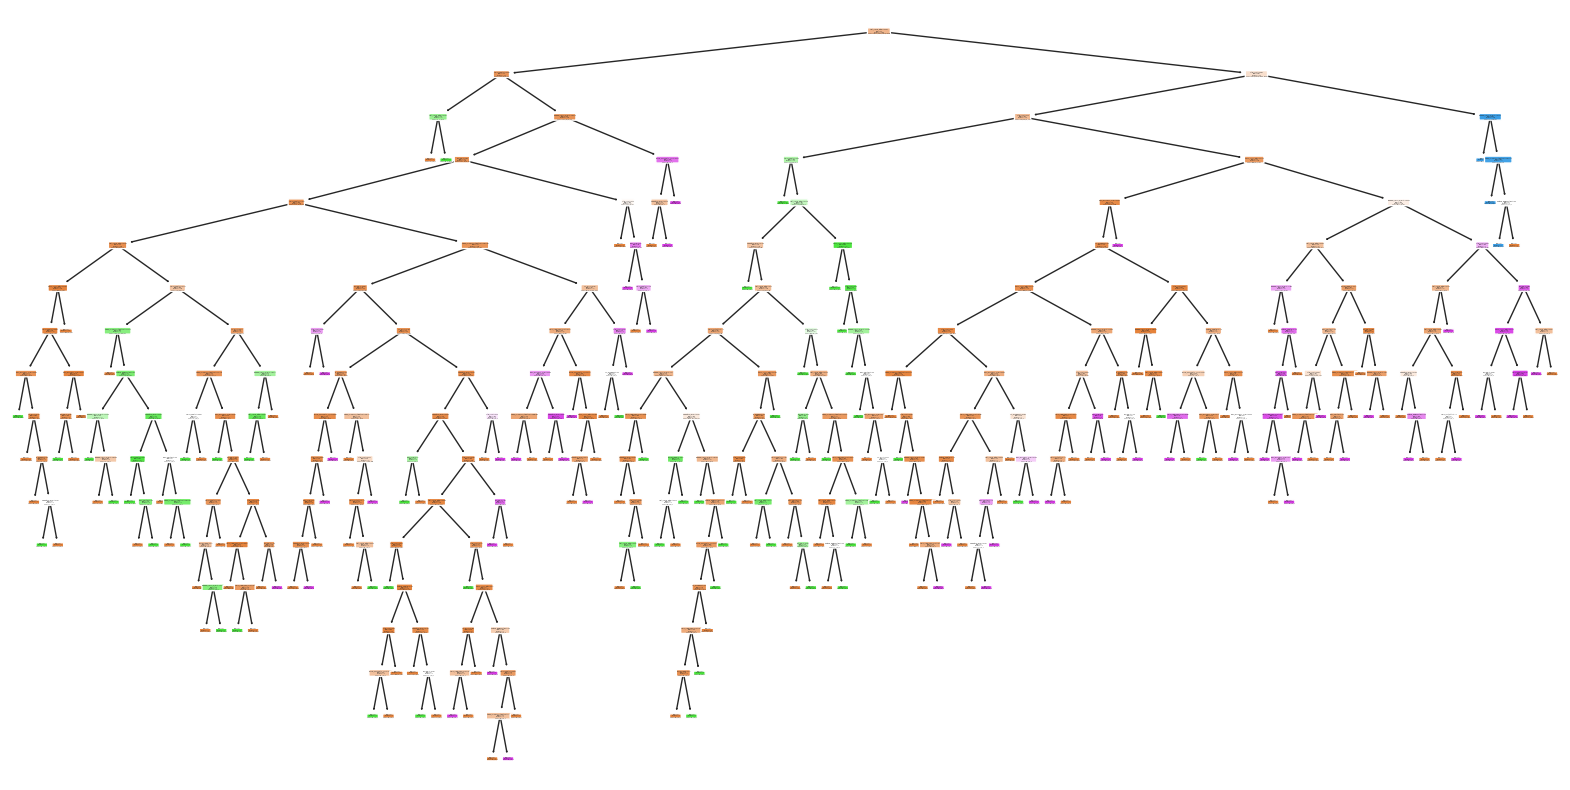

In [173]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

tree = rf_clf.estimators_[0]
print(export_text(tree, feature_names=list(X.columns)))
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()


Già delle statistiche possiamo vedere, che è andato in overfitting... troppe foglie, eccessiva profondità, ma per avere la certezza assoluta, valutiamo l'accuratezza tra train e test set.
Se accurancy_train>>accurancy_test => overfitting

In [180]:
print("Train accuracy:", rf_clf.score(X_train, y_train))
print("Test accuracy:", rf_clf.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.8544891640866873


Vuol dire che il modello ha imparato perfettamente i dati di training, ma quando lo applichiamo a dati mai visti prima l’accuratezza scende a 0.923.

=> il modello è troppo complesso, ha “memorizzato” i dati di training e non generalizza  bene su dati nuovi.

In [181]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

cv_scores = cross_val_score(rf_clf, X, y, cv=kfold)
print(f"Cross-Validation Accuracy: {cv_scores}")
print(f'Precisione media: {cv_scores.mean():.2%}')
print(f'Deviazione standard: {cv_scores.std():.2%}')

Cross-Validation Accuracy: [0.88041237 0.84948454 0.85360825 0.88016529 0.8677686  0.89256198
 0.8946281  0.90082645 0.83677686 0.85330579]
Precisione media: 87.10%
Deviazione standard: 2.08%


Il modello generalizza bene, dando performance stabili e affidabili su diversi subset del dataset.
MA... il problema è che va in overfitting, e le metriche sulla classe low sono scarsette per via del fatto che ha pochi data point.

### MIGLIORAMENTO 1
Cerchiamo di ridurre l'overfitting andando a
1. fare **feature importance** => riduciamo le feature => riduciamo la dimensionalià dell'albero
2. **SMOTE** per bilanciare le classi minoritarie


              precision    recall  f1-score   support

           0       0.89      0.86      0.87       614
           1       0.78      0.76      0.77       151
           2       0.78      0.93      0.85       148
           3       0.46      0.43      0.44        56

    accuracy                           0.83       969
   macro avg       0.73      0.74      0.73       969
weighted avg       0.83      0.83      0.83       969



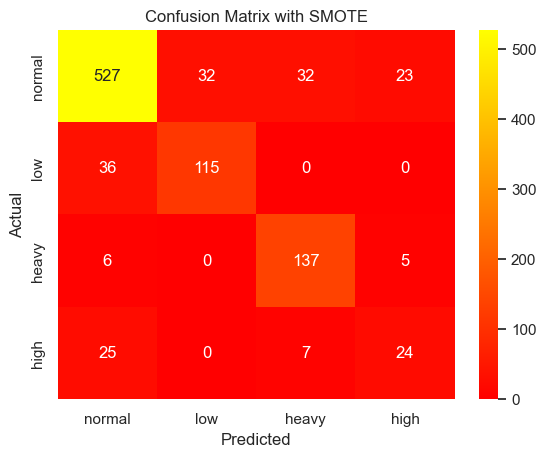

In [182]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_cfl_smote = RandomForestClassifier()
rf_cfl_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = rf_cfl_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

#Matrice di confusione
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='autumn', xticklabels=["normal", "low", "heavy", "high"], yticklabels=["normal", "low", "heavy", "high"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with SMOTE")
plt.show()

 Analisi della Random Forest
- Numero di alberi nella foresta: 100
- Profondità media: 21.13
- Numero medio di foglie: 383.92
- Profondità massima: 29
- Profondità minima: 17


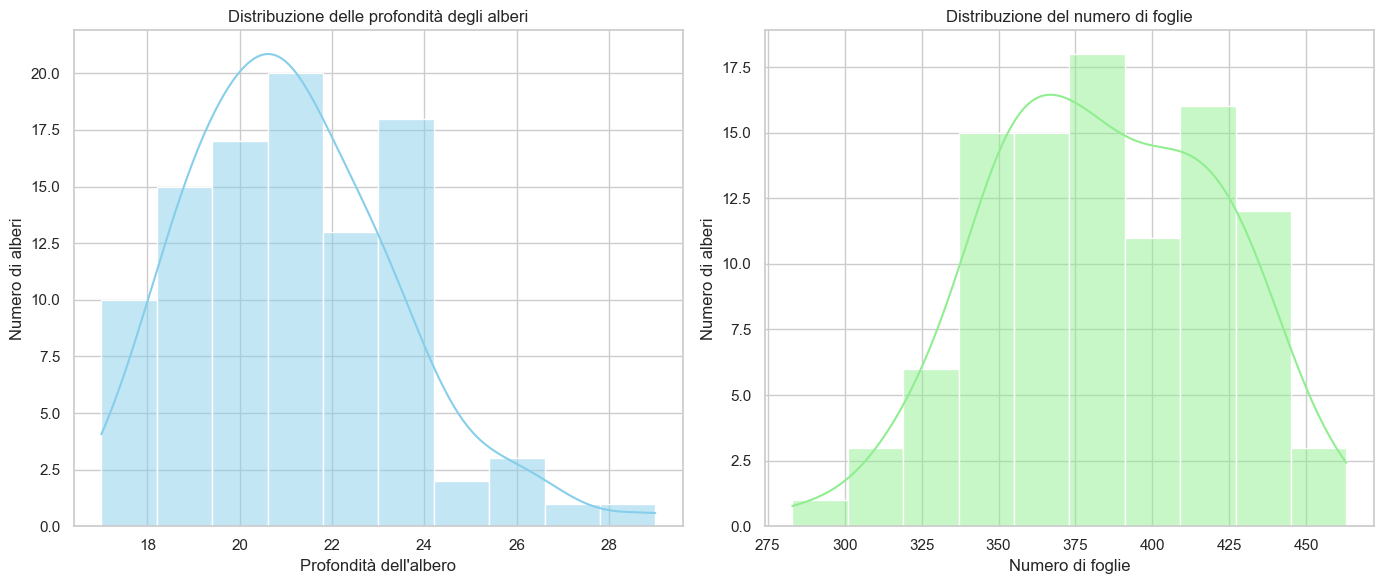

In [183]:
# Calcolo statistiche globali sugli alberi della foresta
depths = [tree.get_depth() for tree in rf_clf.estimators_]
leaves = [tree.get_n_leaves() for tree in rf_clf.estimators_]

print(" Analisi della Random Forest")
print(f"- Numero di alberi nella foresta: {len(rf_clf.estimators_)}")
print(f"- Profondità media: {sum(depths) / len(depths):.2f}")
print(f"- Numero medio di foglie: {sum(leaves) / len(leaves):.2f}")
print(f"- Profondità massima: {max(depths)}")
print(f"- Profondità minima: {min(depths)}")

# Imposta lo stile del grafico
sns.set_theme(style="whitegrid")

# Crea la figura con due sottografici
plt.figure(figsize=(14, 6))

# Distribuzione della profondità
plt.subplot(1, 2, 1)
sns.histplot(depths, bins=10, kde=True, color="skyblue")
plt.title("Distribuzione delle profondità degli alberi")
plt.xlabel("Profondità dell'albero")
plt.ylabel("Numero di alberi")

# Distribuzione del numero di foglie
plt.subplot(1, 2, 2)
sns.histplot(leaves, bins=10, kde=True, color="lightgreen")
plt.title("Distribuzione del numero di foglie")
plt.xlabel("Numero di foglie")
plt.ylabel("Numero di alberi")

# Mostra i grafici
plt.tight_layout()
plt.show()

In [ ]:
tree = rf_cfl_smote.estimators_[0]
print(export_text(tree, feature_names=list(X.columns)))
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [184]:
print("Train accuracy:", rf_cfl_smote.score(X_train, y_train))
print("Test accuracy:", rf_cfl_smote.score(X_test, y_test))

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

cv_scores = cross_val_score(rf_cfl_smote, X, y, cv=kfold)
print(f"Cross-Validation Accuracy: {cv_scores}")
print(f'Precisione media: {cv_scores.mean():.2%}')
print(f'Deviazione standard: {cv_scores.std():.2%}')

Train accuracy: 1.0
Test accuracy: 0.8286893704850361
Cross-Validation Accuracy: [0.89484536 0.85360825 0.83092784 0.88636364 0.87190083 0.88429752
 0.89256198 0.89256198 0.83264463 0.85123967]
Precisione media: 86.91%
Deviazione standard: 2.38%


FEATURE IMPORTANCE + SMOTE

                        Feature  Importance
11              Vehicle_Density    0.218778
10             Congestion_Index    0.202938
12          Heavy_Vehicle_Ratio    0.134444
13          Light_Vehicle_Ratio    0.123334
14  Speed_Occupancy_Interaction    0.054254
2          Emission_Levels_g_km    0.046526
3        Energy_Consumption_L_h    0.044937
7                      cos_hour    0.041635
6                      sin_hour    0.032166
15        Weather_RoadCondition    0.029441


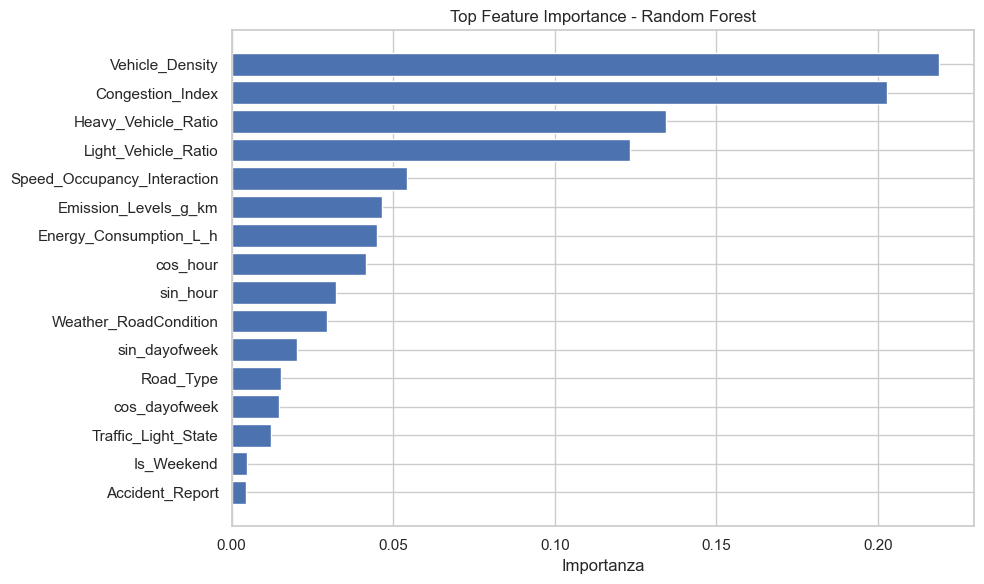

In [185]:
importances = rf_clf.feature_importances_
feature_names = X_train.columns 

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

print(feat_imp.head(10))

plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'][::-1], feat_imp['Importance'][::-1])
plt.xlabel("Importanza")
plt.title("Top Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

Usaimo RFE per selezionara le feature più rilevanti in modo iterativo, allenando il modello e rimuovendo le meno importanti ad ogni ciclo.

In [186]:
from sklearn.feature_selection import RFE

selector = RFE(estimator=rf_clf, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.support_]
print("Feature selezionate da RFE:")
print(selected_features)

# Riduciamo il dataset
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

Feature selezionate da RFE:
Index(['Emission_Levels_g_km', 'Energy_Consumption_L_h', 'sin_hour',
       'cos_hour', 'Congestion_Index', 'Vehicle_Density',
       'Heavy_Vehicle_Ratio', 'Light_Vehicle_Ratio',
       'Speed_Occupancy_Interaction', 'Weather_RoadCondition'],
      dtype='object')


              precision    recall  f1-score   support

           0       0.85      0.97      0.91       614
           1       0.92      0.67      0.77       151
           2       0.93      0.94      0.94       148
           3       0.69      0.16      0.26        56

    accuracy                           0.87       969
   macro avg       0.85      0.68      0.72       969
weighted avg       0.87      0.87      0.85       969

Accuracy: 0.8699690402476781


<Axes: >

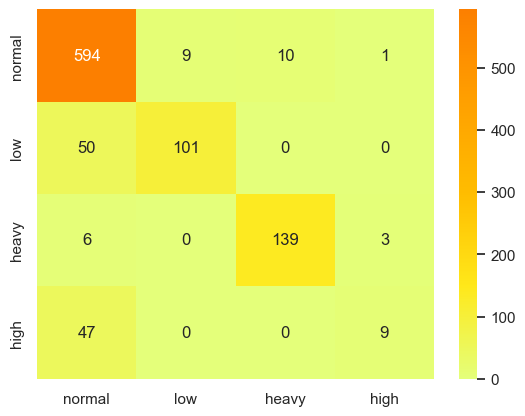

In [187]:
from sklearn.metrics import classification_report, accuracy_score

# training con le feature selezionate
rf_clf_rfe = RandomForestClassifier(random_state=42)
rf_clf_rfe.fit(X_train_rfe, y_train)


y_pred_rfe= rf_clf_rfe.predict(X_test_rfe)
print(classification_report(y_test, y_pred_rfe))
print("Accuracy:", accuracy_score(y_test, y_pred_rfe))

cm_rfe = confusion_matrix(y_test, y_pred_rfe)
sns.heatmap(cm_rfe, annot=True, fmt='d', cmap='Wistia', 
            xticklabels=["normal", "low", "heavy", "high"], 
            yticklabels=["normal", "low", "heavy", "high"])


 Analisi della Random Forest
- Numero di alberi nella foresta: 100
- Profondità media: 20.35
- Numero medio di foglie: 346.39
- Profondità massima: 31
- Profondità minima: 15


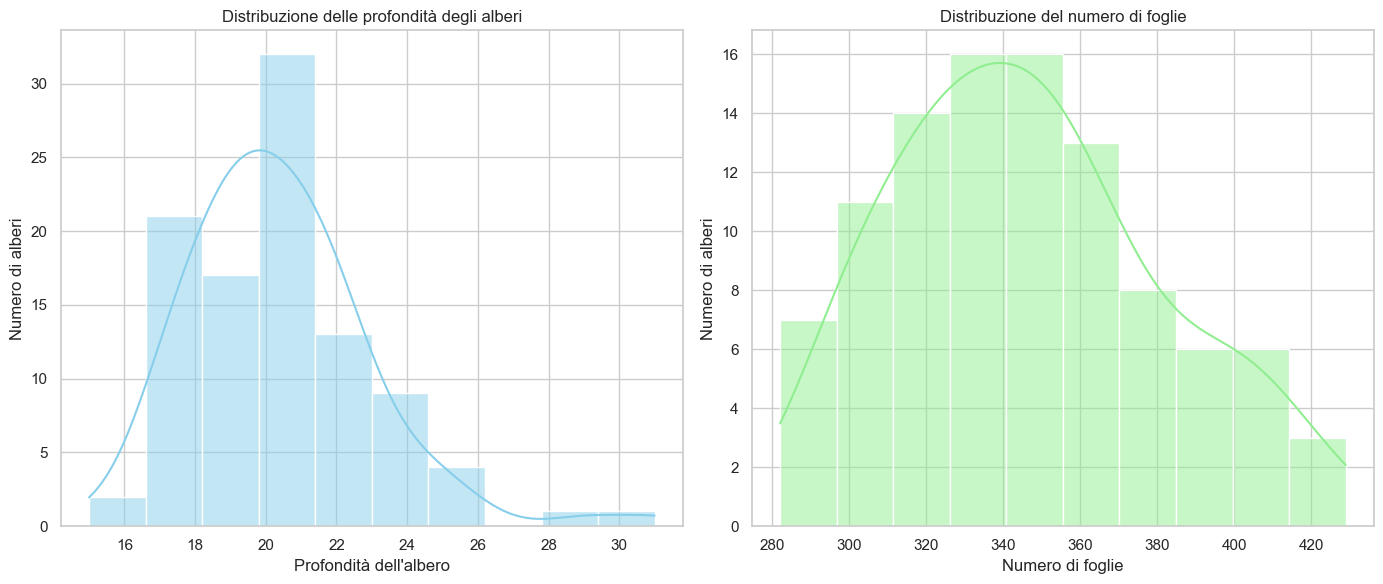

In [188]:
# Calcolo statistiche globali sugli alberi della foresta
depths = [tree.get_depth() for tree in rf_clf_rfe.estimators_]
leaves = [tree.get_n_leaves() for tree in rf_clf_rfe.estimators_]

print(" Analisi della Random Forest")
print(f"- Numero di alberi nella foresta: {len(rf_clf_rfe.estimators_)}")
print(f"- Profondità media: {sum(depths) / len(depths):.2f}")
print(f"- Numero medio di foglie: {sum(leaves) / len(leaves):.2f}")
print(f"- Profondità massima: {max(depths)}")
print(f"- Profondità minima: {min(depths)}")

# Imposta lo stile del grafico
sns.set_theme(style="whitegrid")

# Crea la figura con due sottografici
plt.figure(figsize=(14, 6))

# Distribuzione della profondità
plt.subplot(1, 2, 1)
sns.histplot(depths, bins=10, kde=True, color="skyblue")
plt.title("Distribuzione delle profondità degli alberi")
plt.xlabel("Profondità dell'albero")
plt.ylabel("Numero di alberi")

# Distribuzione del numero di foglie
plt.subplot(1, 2, 2)
sns.histplot(leaves, bins=10, kde=True, color="lightgreen")
plt.title("Distribuzione del numero di foglie")
plt.xlabel("Numero di foglie")
plt.ylabel("Numero di alberi")

# Mostra i grafici
plt.tight_layout()
plt.show()

In [ ]:
tree_rfe = rf_clf_rfe.estimators_[0]
print(export_text(tree_rfe, feature_names=list(X_train_rfe.columns)))
plt.figure(figsize=(20,10))
plot_tree(tree_rfe, feature_names=X_train_rfe.columns, filled=True, rounded=True)
plt.show()

In [189]:
print("Train accuracy:", rf_clf_rfe.score(X_train_rfe, y_train))
print("Test accuracy:", rf_clf_rfe.score(X_test_rfe, y_test))

Train accuracy: 1.0
Test accuracy: 0.8699690402476781


Proviamo SMOTE sulle feature selected, il modello va ancora in overfitting. :|

In [190]:
# Applichiamo SMOTE solo sulle feature selezionate da RFE
X_train_rfe_smote, y_train_rfe_smote = SMOTE(random_state=42).fit_resample(X_train_rfe, y_train)

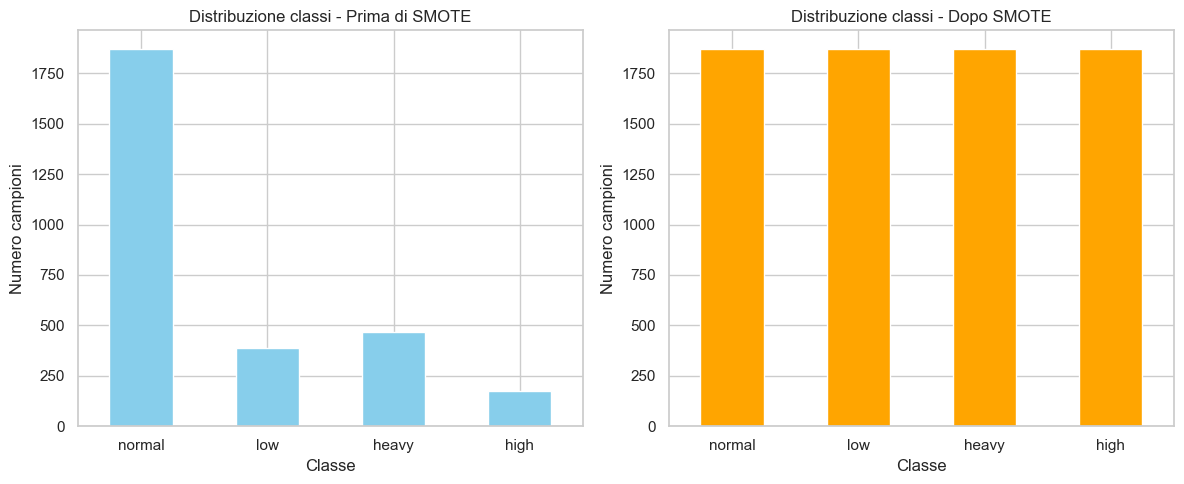

In [191]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Prima di SMOTE
y_train.value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribuzione classi - Prima di SMOTE')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Numero campioni')
axes[0].set_xticklabels(["normal", "low", "heavy", "high"], rotation=0)

# Dopo SMOTE
y_train_rfe_smote.value_counts().sort_index().plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Distribuzione classi - Dopo SMOTE')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Numero campioni')
axes[1].set_xticklabels(["normal", "low","heavy", "high"], rotation=0)

plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       614
           1       0.77      0.85      0.81       151
           2       0.83      0.93      0.88       148
           3       0.45      0.52      0.48        56

    accuracy                           0.84       969
   macro avg       0.74      0.79      0.76       969
weighted avg       0.85      0.84      0.85       969

Accuracy: 0.8441692466460269


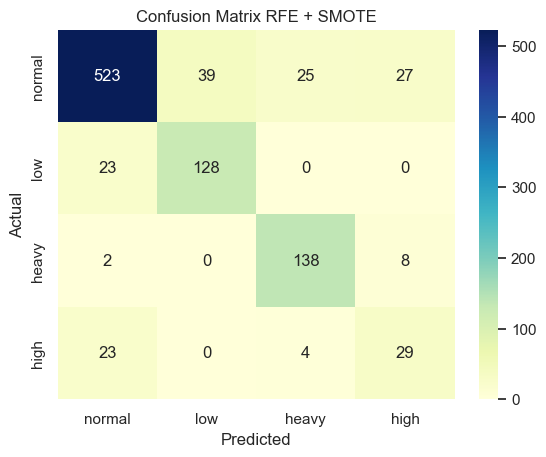

In [192]:
# Alleniamo il modello Random Forest sulle feature selezionate e dati bilanciati
rf_clf_rfe_smote = RandomForestClassifier(random_state=42)
rf_clf_rfe_smote.fit(X_train_rfe_smote, y_train_rfe_smote)

# Predizione e valutazione
y_pred_rfe_smote = rf_clf_rfe_smote.predict(X_test_rfe)
print(classification_report(y_test, y_pred_rfe_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_rfe_smote))

cm_rfe_smote = confusion_matrix(y_test, y_pred_rfe_smote)
sns.heatmap(cm_rfe_smote, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=["normal", "low", "heavy", "high"], 
            yticklabels=["normal", "low", "heavy", "high"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RFE + SMOTE")
plt.show()

Analisi della Random Forest (RFE + SMOTE):
- Numero di alberi: 100
- Profondità media: 22.65
- Numero medio di foglie: 640.11
- Profondità massima: 29
- Profondità minima: 18


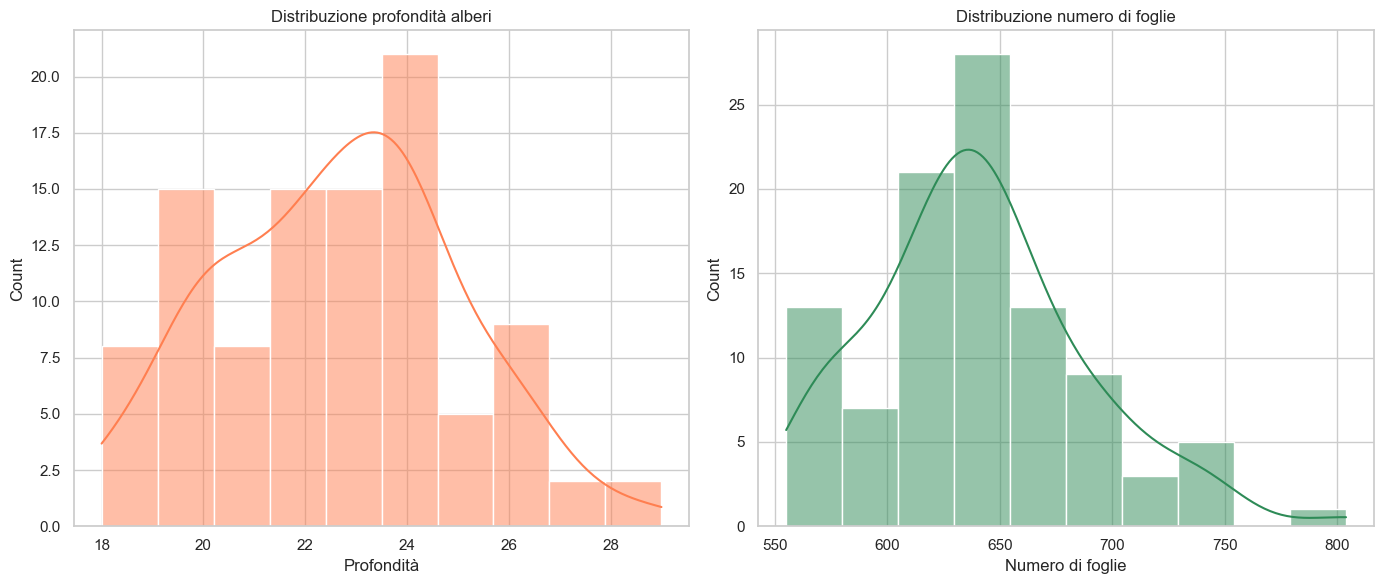

In [193]:
# Analisi struttura della foresta
depths = [tree.get_depth() for tree in rf_clf_rfe_smote.estimators_]
leaves = [tree.get_n_leaves() for tree in rf_clf_rfe_smote.estimators_]

print("Analisi della Random Forest (RFE + SMOTE):")
print(f"- Numero di alberi: {len(rf_clf_rfe_smote.estimators_)}")
print(f"- Profondità media: {sum(depths)/len(depths):.2f}")
print(f"- Numero medio di foglie: {sum(leaves)/len(leaves):.2f}")
print(f"- Profondità massima: {max(depths)}")
print(f"- Profondità minima: {min(depths)}")

# Plot distribuzioni
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(depths, bins=10, kde=True, color="coral")
plt.title("Distribuzione profondità alberi")
plt.xlabel("Profondità")

plt.subplot(1, 2, 2)
sns.histplot(leaves, bins=10, kde=True, color="seagreen")
plt.title("Distribuzione numero di foglie")
plt.xlabel("Numero di foglie")

plt.tight_layout()
plt.show()


In [ ]:

tree_rfe_smote = rf_clf_rfe_smote.estimators_[0] 

print(export_text(tree_rfe_smote, feature_names=list(X_train_rfe_smote.columns)))

plt.figure(figsize=(20,10))
plot_tree(tree_rfe_smote, feature_names=X_train_rfe_smote.columns, filled=True, rounded=True)
plt.title("Visualizzazione di un singolo albero (RFE + SMOTE)")
plt.show()

In [194]:
print("Train Accuracy:", rf_clf_rfe_smote.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", rf_clf_rfe_smote.score(X_test_rfe, y_test))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_clf_rfe_smote, X_train_rfe_smote, y_train_rfe_smote, cv=kfold)

print("\nK-Fold Cross Validation Results:")
print(f"- Accuracy per fold: {cv_scores}")
print(f"- Accuracy media: {cv_scores.mean():.2%}")
print(f"- Deviazione standard: {cv_scores.std():.2%}")

Train Accuracy: 1.0
Test Accuracy: 0.8441692466460269

K-Fold Cross Validation Results:
- Accuracy per fold: [0.92780749 0.93850267 0.95187166 0.95588235 0.93850267 0.94117647
 0.93842035 0.93038822 0.95314592 0.94912985]
- Accuracy media: 94.25%
- Deviazione standard: 0.91%


ANCORA!!!

In [195]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Definizione spazio iperparametri
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False] 
}

# StratifiedKFold per validazione
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Esecuzione del tuning
rf_random_search.fit(X_train_rfe_smote, y_train_rfe_smote)

# Migliori parametri trovati
print("Best Parameters:", rf_random_search.best_params_)
print("Best CV Score:", rf_random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': False, 'max_depth': 26, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 93}
Best CV Score: 0.9404767227657252


Train Accuracy (SMOTE): 1.0
Test Accuracy: 0.8575851393188855
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       614
           1       0.78      0.83      0.80       151
           2       0.85      0.91      0.88       148
           3       0.54      0.52      0.53        56

    accuracy                           0.86       969
   macro avg       0.77      0.78      0.78       969
weighted avg       0.86      0.86      0.86       969



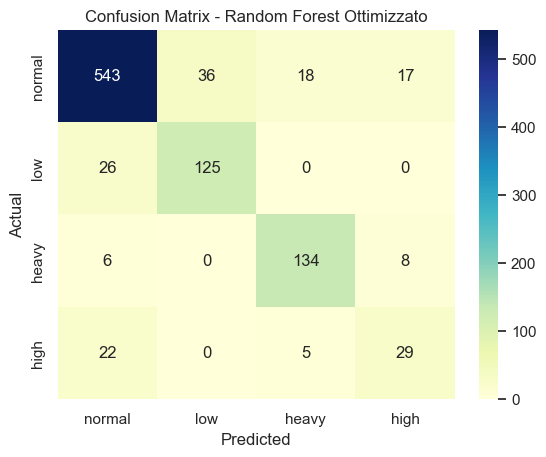

In [196]:
# Modello ottimizzato
best_rf = rf_random_search.best_estimator_

# Accuracy su training (SMOTE) e test
print("Train Accuracy (SMOTE):", best_rf.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", best_rf.score(X_test_rfe, y_test))

# Report dettagliato
y_pred_test_opt = best_rf.predict(X_test_rfe)
print(classification_report(y_test, y_pred_test_opt))

# Confusion matrix
cm_opt = confusion_matrix(y_test, y_pred_test_opt)
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["normal", "low","heavy", "high"], 
            yticklabels=["normal", "low","heavy", "high"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Ottimizzato")
plt.show()

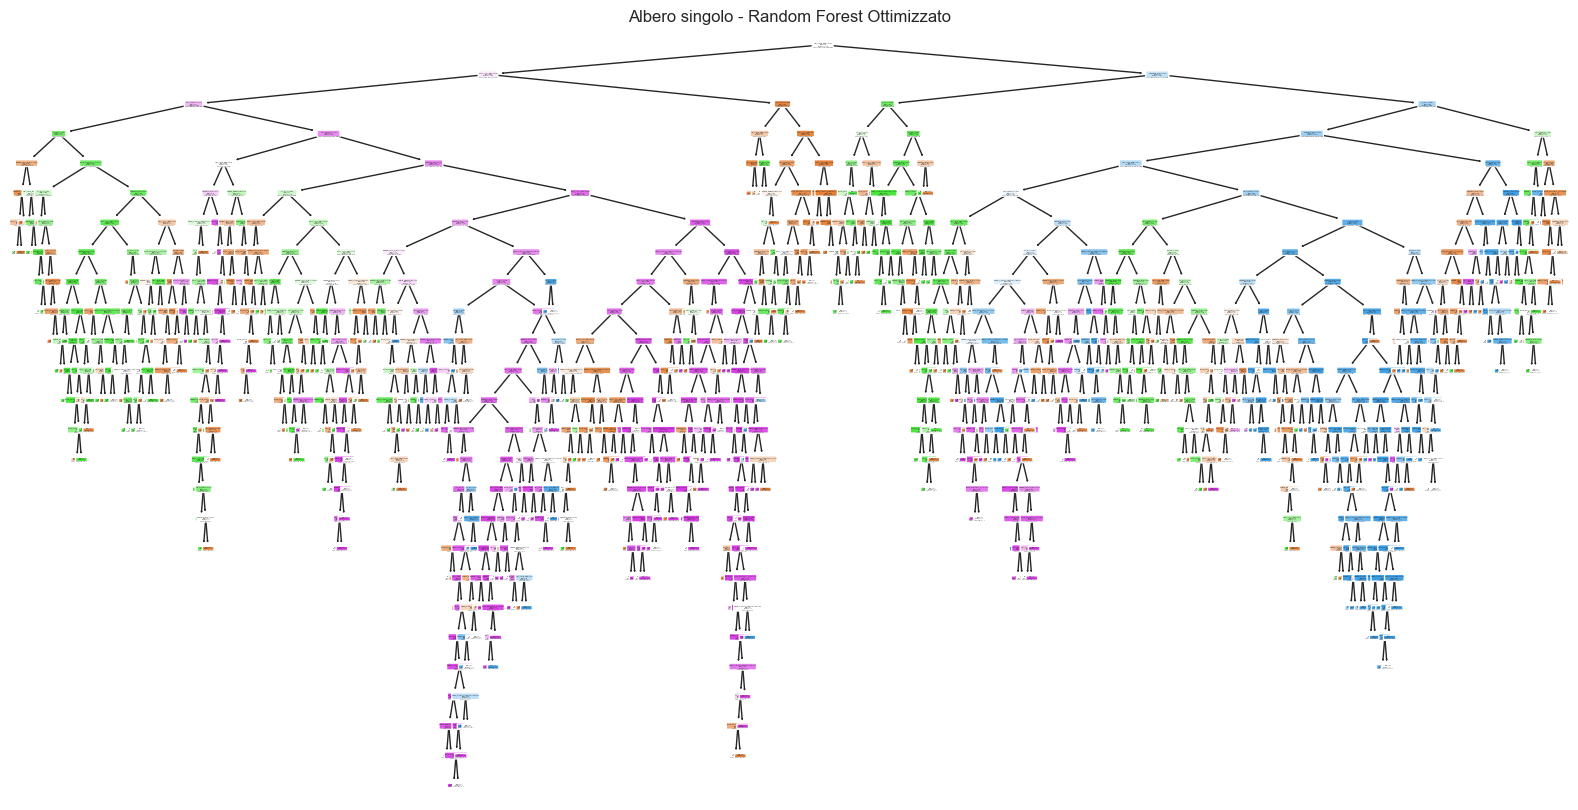

In [197]:
tree_opt = best_rf.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(tree_opt, feature_names=X_train_rfe_smote.columns, filled=True, rounded=True)
plt.title("Albero singolo - Random Forest Ottimizzato")
plt.show()

### CURVA AUC-ROC
La curva ROC AUC multiclasse è utile per visualizzare come il modello distingue tra ciascuna classe (Low, Medium, High).  La curva ROC AUC si calcola esclusivamente sui dati di test.

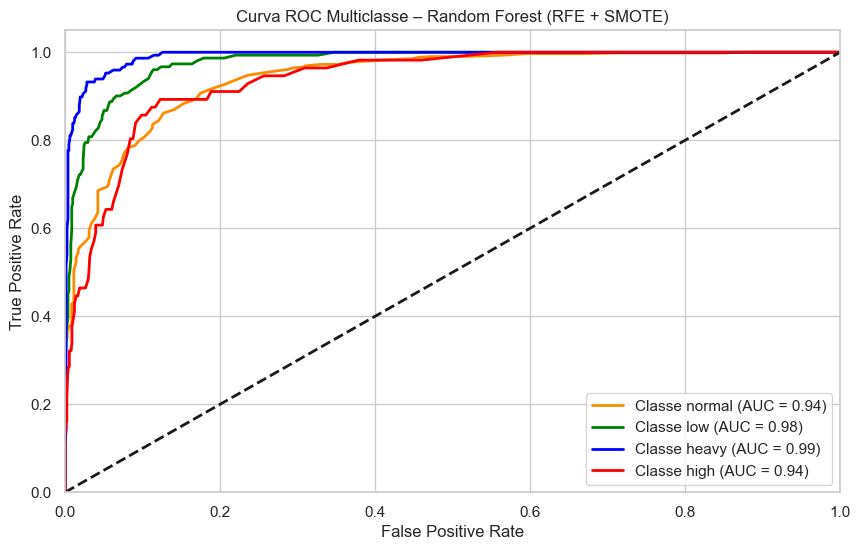

In [200]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarizza le etichette reali del test set
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_bin.shape[1]

# Predizione probabilità con il modello addestrato su SMOTE + RFE
y_score = rf_clf_rfe_smote.predict_proba(X_test_rfe)  

# Calcolo ROC per ogni classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Colori e nomi classi per il grafico
colors = cycle(['darkorange', 'green', 'blue', 'red'])
class_names = ["normal", "low", "heavy", "high"]

# Plot della curva ROC multiclass
plt.figure(figsize=(10, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Classe {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse – Random Forest (RFE + SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Confronto con altri modelli

=== RANDOM FOREST ===
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       614
           1       0.78      0.83      0.80       151
           2       0.85      0.91      0.88       148
           3       0.54      0.52      0.53        56

    accuracy                           0.86       969
   macro avg       0.77      0.78      0.78       969
weighted avg       0.86      0.86      0.86       969

Train Accuracy: 1.0
Test Accuracy: 0.8575851393188855

=== SVM ===
              precision    recall  f1-score   support

           0       0.61      0.17      0.26       614
           1       0.16      0.26      0.20       151
           2       0.17      0.14      0.16       148
           3       0.06      0.45      0.10        56

    accuracy                           0.19       969
   macro avg       0.25      0.25      0.18       969
weighted avg       0.44      0.19      0.23       969

Train Accuracy: 0.29307116104868913
Test 

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== LOGISTIC REGRESSION (L2) ===
              precision    recall  f1-score   support

           0       0.74      0.23      0.35       614
           1       0.25      0.62      0.36       151
           2       0.38      0.64      0.48       148
           3       0.08      0.21      0.12        56

    accuracy                           0.36       969
   macro avg       0.36      0.43      0.33       969
weighted avg       0.57      0.36      0.36       969

Train Accuracy: 0.43686463349384697
Test Accuracy: 0.35500515995872034


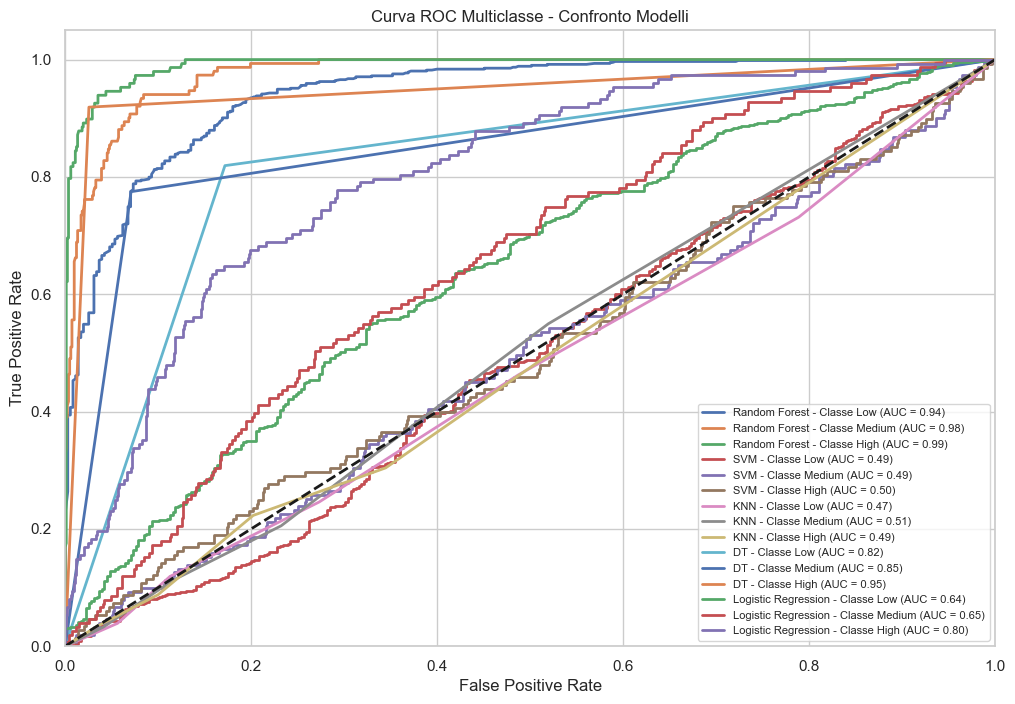

In [199]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

# === DECISION TREE ===

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_rfe_smote, y_train_rfe_smote)
y_pred_dt = dt_clf.predict(X_test_rfe)


# === SVM ===
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train_rfe_smote, y_train_rfe_smote)
y_pred_svm = svm_clf.predict(X_test_rfe)

# === KNN ===
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_rfe_smote, y_train_rfe_smote)
y_pred_knn = knn_clf.predict(X_test_rfe)

        
# === Report e Accuracy ===
print("=== RANDOM FOREST ===")
y_pred_test_opt = best_rf.predict(X_test_rfe)
print(classification_report(y_test, y_pred_test_opt))
print("Train Accuracy:", best_rf.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_opt))

print("\n=== SVM ===")
print(classification_report(y_test, y_pred_svm))
print("Train Accuracy:", svm_clf.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\n=== KNN ===")
print(classification_report(y_test, y_pred_knn))
print("Train Accuracy:", knn_clf.score(X_train_rfe_smote, y_train_rfe_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

print("\n=== DECISION TREE ===")
print(classification_report(y_test, y_pred_dt))
print("Train Accuracy:", dt_clf.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", accuracy_score(y_test, y_pred_dt))

# === LOGISTIC REGRESSION ===
logreg_clf = LogisticRegression(penalty='l2',C=1.0, solver='lbfgs', multi_class='multinomial', max_iter=1000, class_weight='balanced',random_state=42)
logreg_clf.fit(X_train_rfe_smote, y_train_rfe_smote)
y_pred_logreg = logreg_clf.predict(X_test_rfe)

print("\n=== LOGISTIC REGRESSION (L2) ===")
print(classification_report(y_test, y_pred_logreg))
print("Train Accuracy:", logreg_clf.score(X_train_rfe_smote, y_train_rfe_smote))
print("Test Accuracy:", accuracy_score(y_test, y_pred_logreg))

# === ROC curve per modelli supervisionati ===

models = {
    'Random Forest': best_rf,
    'SVM': svm_clf,
    'KNN': knn_clf,
    'DT': dt_clf,
    'Logistic Regression': logreg_clf
}

y_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_bin.shape[1]
colors = cycle(['darkorange', 'green', 'blue'])
class_names = ['Low', 'Medium', 'High']

plt.figure(figsize=(12,8))

for name, model in models.items():
    y_score = model.predict_proba(X_test_rfe)
    roc_auc = dict()
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2,
                 label=f'{name} - Classe {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse - Confronto Modelli')
plt.legend(loc='lower right', fontsize=8)
plt.grid(True)
plt.show()


### Cosa conta di più nella predizione del traffico?

Dipende dal **target** del modello. In base a cosa vogliamo prevedere, cambiano le metriche e le priorità.

| **Target**                          | **Priorità**         |                                                                  |
|------------------------------------|----------------------|------------------------------------------------------------------------------|
| Tempo di percorrenza (regressione) | Generalizzazione     | Meglio avere una stima robusta, anche se non perfetta per ogni singolo caso |
| Congestione sì/no (classificazione)| Recall o F1-score    | Meglio evitare **falsi negativi** (es. dire “no traffico” quando invece c’è)|
| Incidenti / anomalie               | Recall alto          | Meglio **segnalare un rischio in più** che ignorarne uno reale              |



Train Accuracy: 0.7214
Test Accuracy: 0.7090
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       614
           1       0.54      0.87      0.67       151
           2       0.61      0.96      0.75       148
           3       0.30      0.25      0.27        56

    accuracy                           0.71       969
   macro avg       0.59      0.68      0.61       969
weighted avg       0.76      0.71      0.71       969



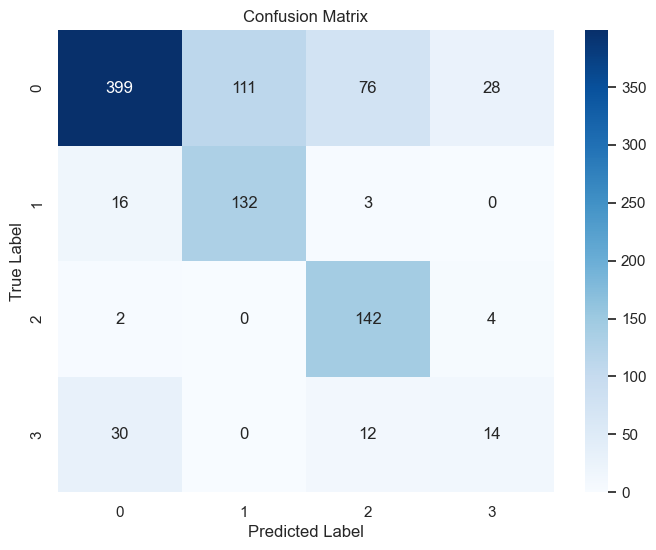

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Standardizzazione ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rfe_smote)
X_test_scaled = scaler.transform(X_test_rfe)

# === 2. Logistic Regression ===
logreg_clf = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=5000,
    class_weight='balanced',
    random_state=42
)
logreg_clf.fit(X_train_scaled, y_train_rfe_smote)

# === 3. Predizione sul train set e calcolo accuracy ===
y_train_proba = logreg_clf.predict_proba(X_train_scaled)
threshold = 0.62

y_train_pred = []
for probs in y_train_proba:
    if probs[3] > threshold:
        y_train_pred.append(3)
    else:
        other_classes = [0, 1, 2]
        best_class = other_classes[np.argmax(probs[other_classes])]
        y_train_pred.append(best_class)
y_train_pred = np.array(y_train_pred)

train_accuracy = accuracy_score(y_train_rfe_smote, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")

# === 4. Predizione sul test set e calcolo accuracy ===
y_test_proba = logreg_clf.predict_proba(X_test_scaled)

y_test_pred = []
for probs in y_test_proba:
    if probs[3] > threshold:
        y_test_pred.append(3)
    else:
        other_classes = [0, 1, 2]
        best_class = other_classes[np.argmax(probs[other_classes])]
        y_test_pred.append(best_class)
y_test_pred = np.array(y_test_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# === 5. Classification report ===
print(classification_report(y_test, y_test_pred))

# === 6. Confusion Matrix ===
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Predizione su nuovi dati

In [202]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

np.random.seed(42)
new_data = pd.DataFrame({
    'Emission_Levels_g_km': np.random.uniform(100, 200, 5),
    'Energy_Consumption_L_h': np.random.uniform(5, 15, 5),
    'CarCount': np.random.randint(100, 500, 5),
    'BikeCount': np.random.randint(50, 200, 5),
    'BusCount': np.random.randint(5, 50, 5),
    'TruckCount': np.random.randint(10, 100, 5),
    'Day': np.random.randint(0, 7, 5),     
    'Hour': np.random.randint(0, 24, 5),  
    'Congestion_Index': np.random.uniform(0, 1, 5)
})


predictions = logreg_clf.predict(new_data)
predicted_probs = logreg_clf.predict_proba(new_data)

predicted_probs_df = pd.DataFrame(predicted_probs, columns=['Prob_Classe_0', 'Prob_Classe_1'])
predictions_df = pd.DataFrame(predictions, columns=['Predicted_Class'])
new_data = pd.concat([new_data, predictions_df, predicted_probs_df], axis=1)
print(new_data)


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 9 features, but LogisticRegression is expecting 10 features as input.

## 4 - PREVISIONE DELLA VELOCITA' DEL TRAFFICO

In [214]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Validation
y_val_pred = logreg.predict(X_val)
print("Validation Report (Logistic Regression):")
print(classification_report(y_val, y_val_pred))

# Test
y_test_pred = logreg.predict(X_test)
print("\nTest Report (Logistic Regression):")
print(classification_report(y_test, y_test_pred))


Validation Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.91      0.55      0.69       876
           1       0.11      0.51      0.18        93

    accuracy                           0.54       969
   macro avg       0.51      0.53      0.43       969
weighted avg       0.84      0.54      0.64       969


Test Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.53      0.67       876
           1       0.08      0.41      0.14        93

    accuracy                           0.52       969
   macro avg       0.49      0.47      0.40       969
weighted avg       0.82      0.52      0.62       969



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [208]:
from sklearn.metrics import classification_report, accuracy_score

# Predizioni su train
y_train_pred = clf.predict(X_train)
print("📘 Train:")
print(classification_report(y_train, y_train_pred))
print(f"Accuracy train: {accuracy_score(y_train, y_train_pred):.4f}")

# Predizioni su validation
y_val_pred = clf.predict(X_val)
print("\n📙 Validation:")
print(classification_report(y_val, y_val_pred))
print(f"Accuracy val: {accuracy_score(y_val, y_val_pred):.4f}")

# Predizioni su test
y_test_pred = clf.predict(X_test)
print("\n📗 Test:")
print(classification_report(y_test, y_test_pred))
print(f"Accuracy test: {accuracy_score(y_test, y_test_pred):.4f}")


📘 Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2626
           1       1.00      1.00      1.00       279

    accuracy                           1.00      2905
   macro avg       1.00      1.00      1.00      2905
weighted avg       1.00      1.00      1.00      2905

Accuracy train: 1.0000

📙 Validation:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       876
           1       0.00      0.00      0.00        93

    accuracy                           0.90       969
   macro avg       0.45      0.50      0.47       969
weighted avg       0.82      0.90      0.86       969

Accuracy val: 0.9040

📗 Test:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       876
           1       0.00      0.00      0.00        93

    accuracy                           0.90       969
   macro avg       0.45      0.50      0.47       9

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🔧 Nuovo modello con iperparametri regolarizzati
clf = RandomForestClassifier(
    n_estimators=100,          # numero di alberi
    max_depth=10,              # profondità massima degli alberi
    min_samples_leaf=10,       # minimo campioni per foglia
    class_weight='balanced',   # gestisce il dataset sbilanciato
    random_state=42
)

# 🔁 Allenamento
clf.fit(X_train, y_train)

# 🔍 Valutazione su validation
y_val_pred = clf.predict(X_val)
print("📙 Validation:")
print(classification_report(y_val, y_val_pred))
print(f"Accuracy val: {accuracy_score(y_val, y_val_pred):.4f}")

# 🧪 Valutazione su test
y_test_pred = clf.predict(X_test)
print("\n📗 Test:")
print(classification_report(y_test, y_test_pred))
print(f"Accuracy test: {accuracy_score(y_test, y_test_pred):.4f}")


📙 Validation:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       876
           1       0.05      0.01      0.02        93

    accuracy                           0.88       969
   macro avg       0.47      0.49      0.48       969
weighted avg       0.82      0.88      0.85       969

Accuracy val: 0.8834

📗 Test:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       876
           1       0.00      0.00      0.00        93

    accuracy                           0.88       969
   macro avg       0.45      0.49      0.47       969
weighted avg       0.82      0.88      0.85       969

Accuracy test: 0.8834


Distribuzione dopo SMOTE:
 Accident_Report
0    2626
1    2626
Name: count, dtype: int64
📙 Validation:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       876
           1       0.00      0.00      0.00        93

    accuracy                           0.90       969
   macro avg       0.45      0.50      0.47       969
weighted avg       0.82      0.90      0.86       969

Accuracy val: 0.9030

📗 Test:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       876
           1       0.00      0.00      0.00        93

    accuracy                           0.90       969
   macro avg       0.45      0.50      0.47       969
weighted avg       0.82      0.90      0.86       969

Accuracy test: 0.9020


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


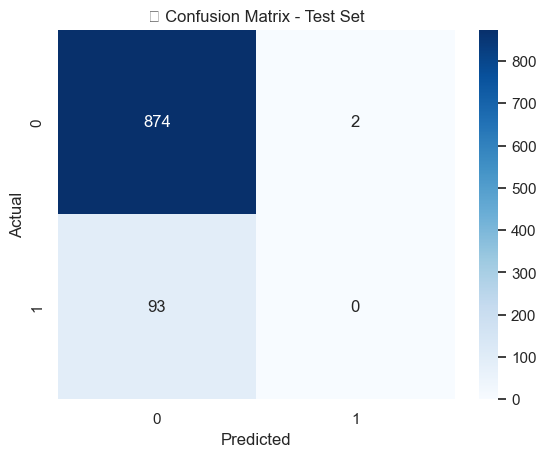

In [212]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 🔁 SMOTE: bilanciamento delle classi
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 📊 Verifica distribuzione classi
print("Distribuzione dopo SMOTE:\n", y_train_resampled.value_counts())

# 🔧 Random Forest su dati bilanciati
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=10,
    random_state=42
)
clf.fit(X_train_resampled, y_train_resampled)

# 📙 Validation
y_val_pred = clf.predict(X_val)
print("📙 Validation:")
print(classification_report(y_val, y_val_pred))
print(f"Accuracy val: {accuracy_score(y_val, y_val_pred):.4f}")

# 📗 Test
y_test_pred = clf.predict(X_test)
print("\n📗 Test:")
print(classification_report(y_test, y_test_pred))
print(f"Accuracy test: {accuracy_score(y_test, y_test_pred):.4f}")

# (Opzionale) Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('📗 Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



📙 Validation:
              precision    recall  f1-score   support

           0       0.91      0.55      0.69       876
           1       0.11      0.52      0.18        93

    accuracy                           0.55       969
   macro avg       0.51      0.53      0.43       969
weighted avg       0.84      0.55      0.64       969

Accuracy val: 0.5470

📗 Test:
              precision    recall  f1-score   support

           0       0.90      0.53      0.67       876
           1       0.09      0.42      0.14        93

    accuracy                           0.52       969
   macro avg       0.49      0.48      0.41       969
weighted avg       0.82      0.52      0.62       969

Accuracy test: 0.5222


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128215 (\N{GREEN BOOK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


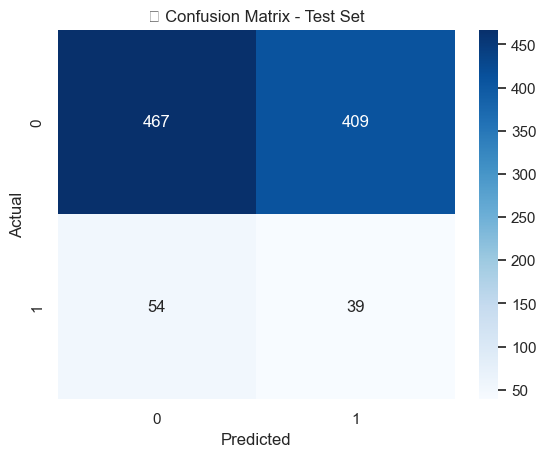

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Modello Logistic Regression con class_weight='balanced'
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train)

# 📙 Validation
y_val_pred = lr_model.predict(X_val)
print("📙 Validation:")
print(classification_report(y_val, y_val_pred))
print(f"Accuracy val: {accuracy_score(y_val, y_val_pred):.4f}")

# 📗 Test
y_test_pred = lr_model.predict(X_test)
print("\n📗 Test:")
print(classification_report(y_test, y_test_pred))
print(f"Accuracy test: {accuracy_score(y_test, y_test_pred):.4f}")

# 🔍 Confusion matrix (test)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('📗 Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
